# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



<img src= "https://www.businessprocessincubator.com/wp-content/uploads/2018/10/www.fico_.comFraud-Management-Team-FIC-83f57a6ec467fcf8c7f911e7cbe2a56f802515b2.jpg" width = 600, height =600>

# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [40]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold
from imblearn.over_sampling import SMOTE
import matplotlib.gridspec as gridspec # to do the grid of plots


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [5]:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet

In [6]:
from deepchecks.tabular import Dataset
ds =  Dataset(df, label="Class", cat_features=[])

In [7]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_IO349RLZ27W7ZGXRNDVUOBD1O">Data Integrity Sui…

**According to Data Integrity Suite, we saw high outliers probobilty score for same index! And we dropped it just for class 0!**


In [8]:
df.drop(df.index[[219257, 229036,61709]], inplace = True)   #we dropped high outliers probobilty score for 0 class 
df.reset_index(inplace=True, drop=True)

In [9]:
from deepchecks.tabular import Dataset
ds =  Dataset(df, label="Class", cat_features=[])

In [ ]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_U751ZO8G2TBPW843EBIFUY4G6">Data Integrity Sui…

### Exploratory Data Analysis

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [11]:
#df['Class'].value_counts()
# get class distribution
print ("Normal transaction:", df['Class'][df['Class'] == 0].count()) #class = 0
print ("Fraudulent transaction:", df['Class'][df['Class'] == 1].count()) #class = 1

Normal transaction: 284312
Fraudulent transaction: 492


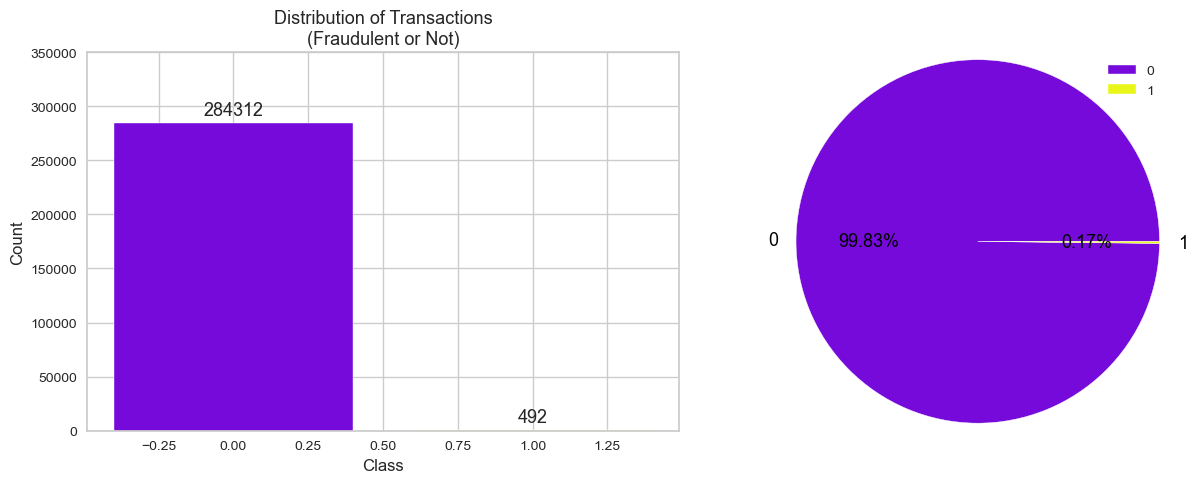

In [12]:
plt.figure(figsize=(13,5))

x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

plt.subplot(121)
g = plt.bar(x, y, label='Class', color=['#750ADA','#E9F619'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 350000)

plt.xlabel('Class'), plt.ylabel('Count') 
plt.title('Distribution of Transactions\n(Fraudulent or Not)', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.2f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['#750ADA','#E9F619'])
plt.legend()

plt.tight_layout();


In [13]:
print('Missing Value   : ', df.isnull().sum().sum())

Missing Value   :  0


**Amount Feature**

In [15]:
df["Amount"].describe()

count   284804.000
mean        88.334
std        250.031
min          0.000
25%          5.600
50%         22.000
75%         77.160
max      25691.160
Name: Amount, dtype: float64

**Amount = 0 olan bir işlem nasıl fraud olabilir ? dolandırıcılar, kartın gizli ayrıntılarını güvenli olmayan web sitelerinden alabilir. eğer + bir kimlilk doğrulama işlemi varsa amount = 0 gözükür.**

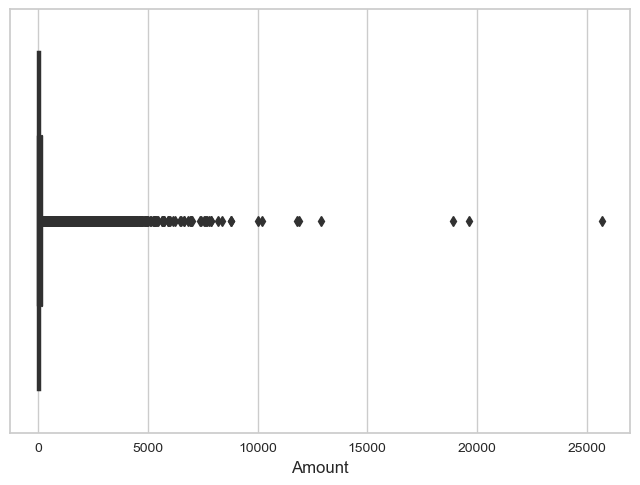

In [16]:
sns.boxplot(data=df, x='Amount');

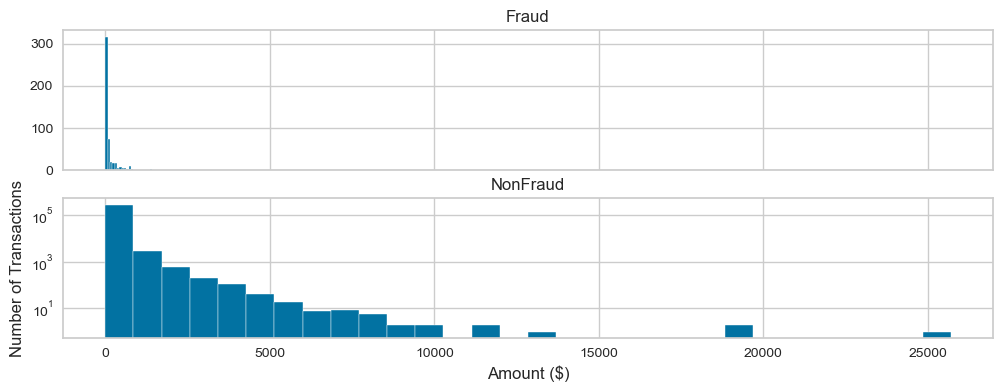

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('NonFraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

**Distribution of the target variable's classes over Amount**

---

In [18]:
nonfraud = df[df.Class==0]
fraud = df[df.Class==1]

print("Total Amount\t\t   : ", np.round(df.Amount.sum(), decimals=2))
print("Fraud Amount\t\t   : ", np.round(fraud.Amount.sum(), decimals=2))
print("Non-Fraud Amount\t   : ", np.round(nonfraud.Amount.sum(), decimals=2))
print("Percentage of Fraud Amount : ", np.round((fraud.Amount.sum()/df.Amount.sum())*100, decimals=2))

Total Amount		   :  25157875.92
Fraud Amount		   :  60127.97
Non-Fraud Amount	   :  25097747.95
Percentage of Fraud Amount :  0.24


In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.016,0.009,-0.006,0.012,-0.008,0.005,0.002,0.010,-0.001,0.004,0.010,-0.007,0.011,0.000,0.012,0.000,0.007,0.012,0.004,-0.001,-0.001,-0.001,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,88.275
1,80746.807,-4.772,3.624,-7.033,4.542,-3.151,-1.398,-5.569,0.571,-2.581,-5.677,3.800,-6.259,-0.109,-6.972,-0.093,-4.140,-6.666,-2.246,0.681,0.372,0.714,0.014,-0.040,-0.105,0.041,0.052,0.171,0.076,122.211


**Time Feature**

In [20]:
df['Time'].value_counts()

163152.000    36
64947.000     26
68780.000     25
3767.000      21
3770.000      20
              ..
127750.000     1
62260.000      1
62259.000      1
127753.000     1
172792.000     1
Name: Time, Length: 124592, dtype: int64

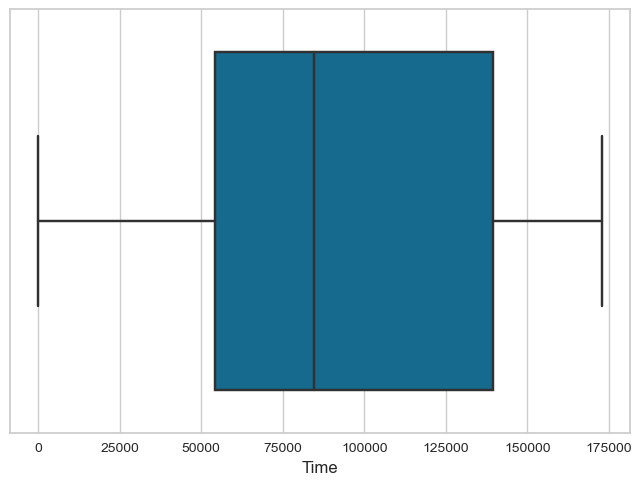

In [21]:
sns.boxplot(data=df, x='Time');

**Distribution of the target variable's classes over Time**

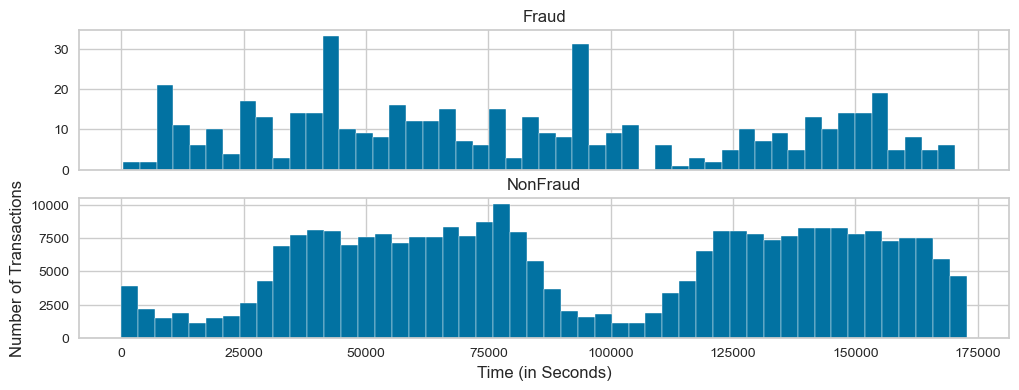

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('NonFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show();

**Frequency Distributions of Amount and Time**

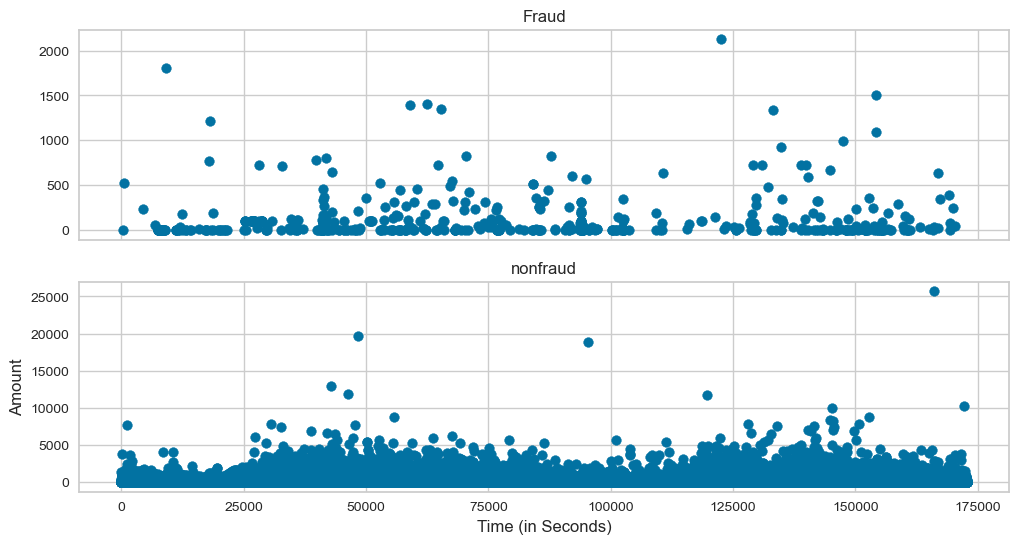

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('nonfraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

**Distribution of the target variable's classes over other variables**

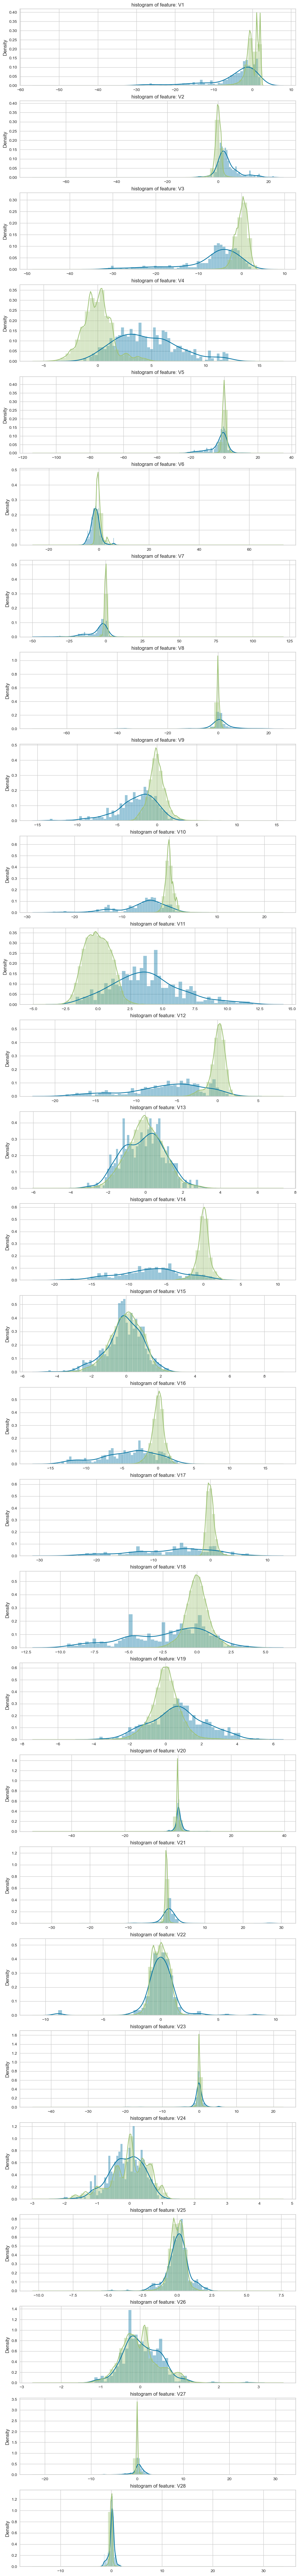

In [ ]:
v_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show();

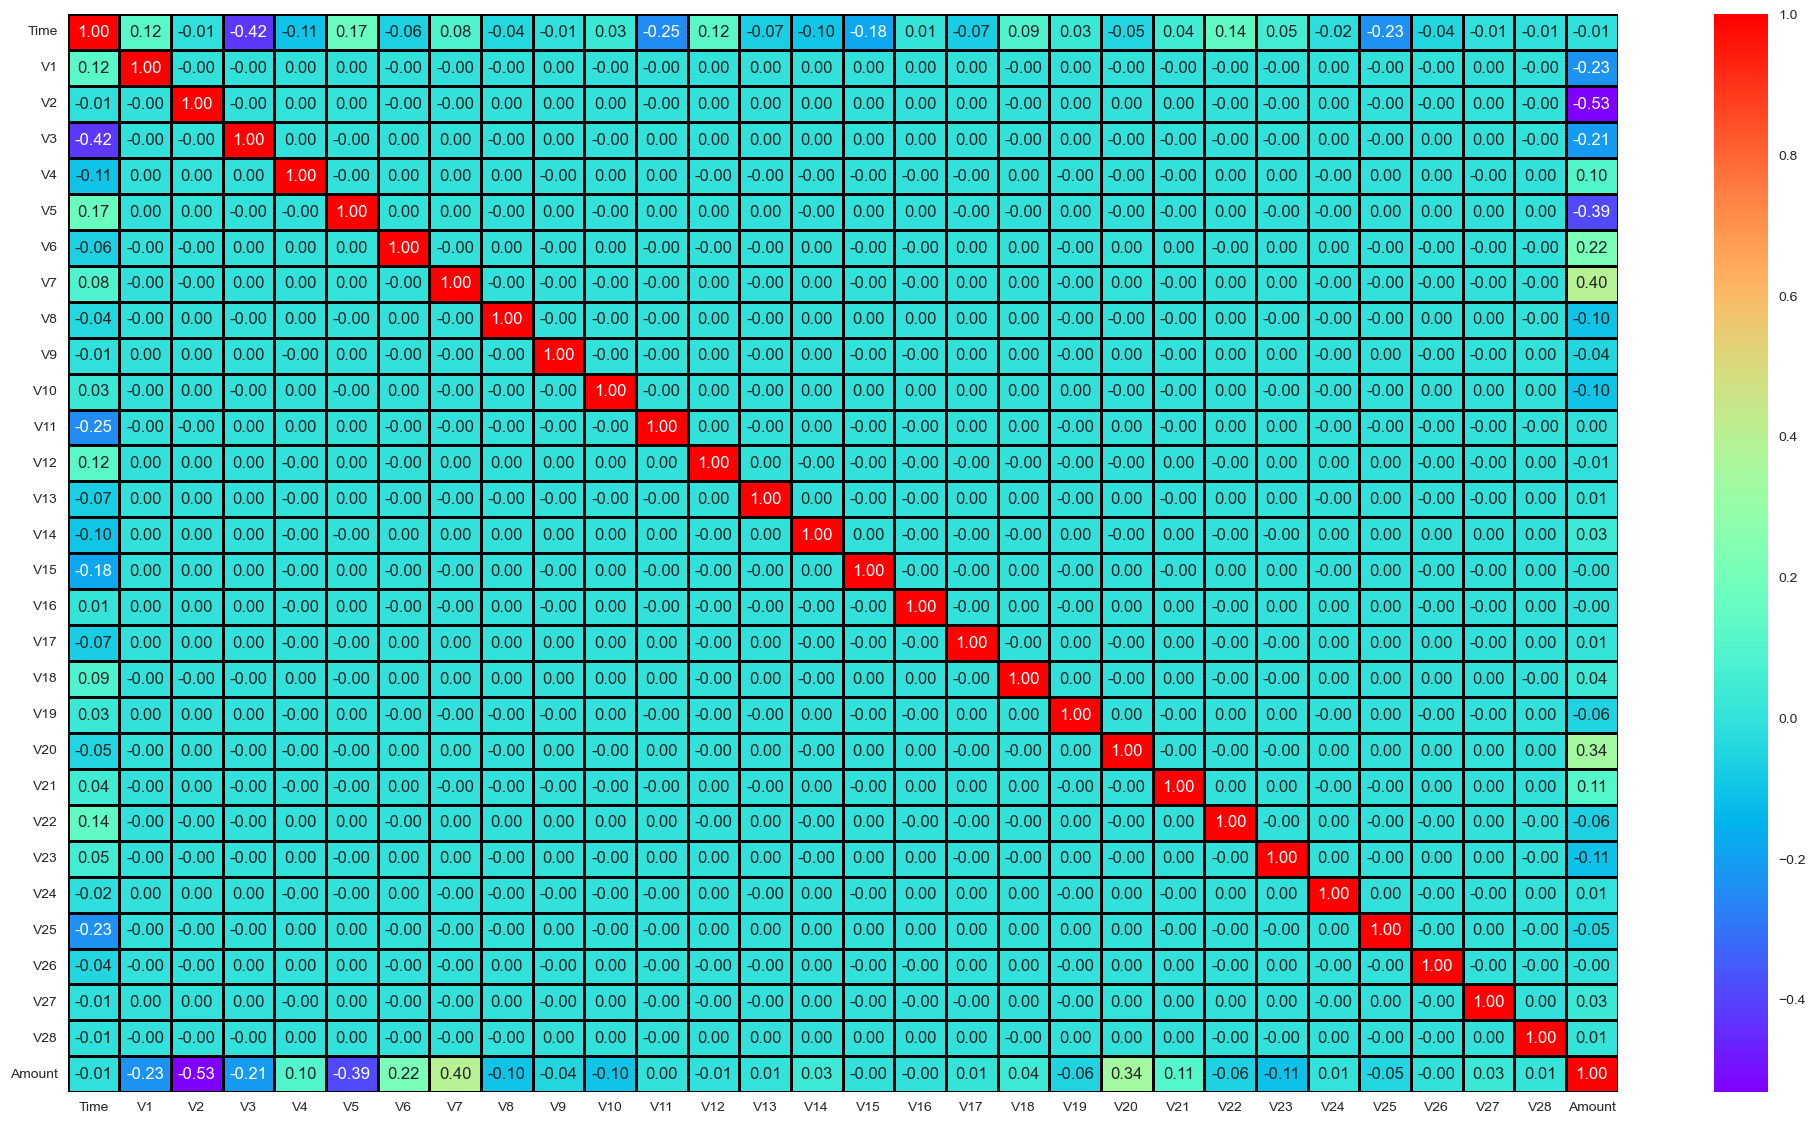

In [24]:
plt.figure(figsize=(25, 14))
sns.heatmap(df.drop('Class',1).corr(), annot=True, cmap='rainbow', linewidth=1, linecolor='black', fmt='.2f');

**PCA SONUCUNDA ELDE EDİLEN PRİNCİPAL COMPONENTLER BİRBİRİNDEN TAMAMEN BAĞIMSIZDIR VE DOLAYISIYLA KORELASYONLARI YOKTUR.**

**Correlation of Target Classes of Other Classes**

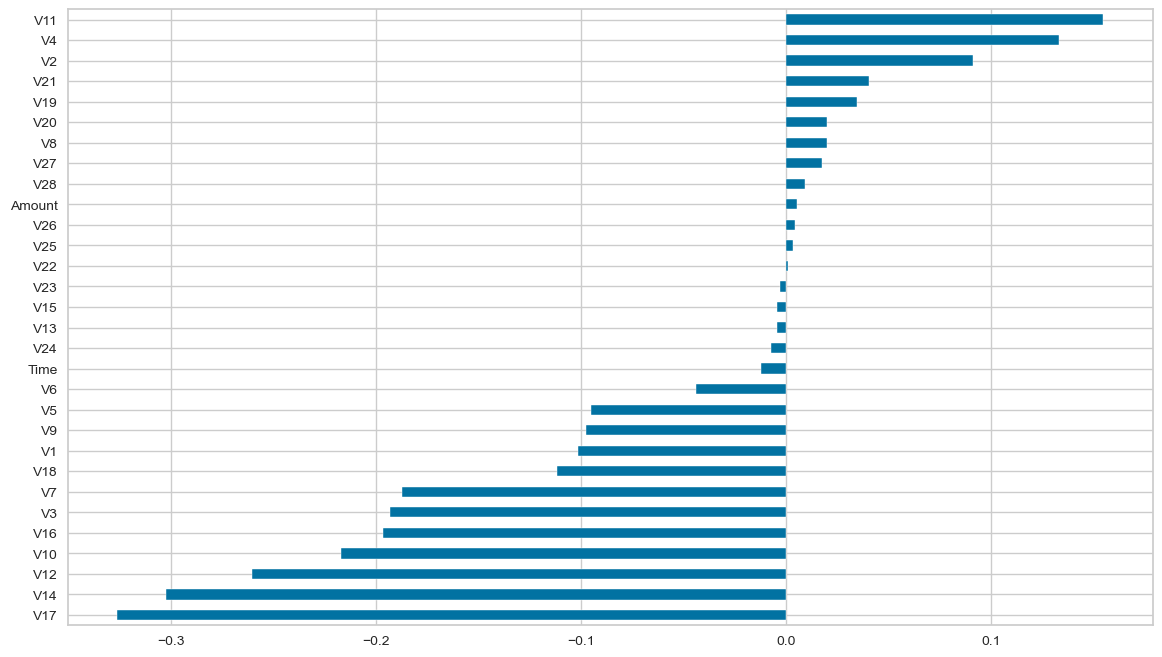

In [25]:
plt.figure(figsize=(14, 8))
df.corr()['Class'].drop('Class').sort_values().plot(kind='barh');

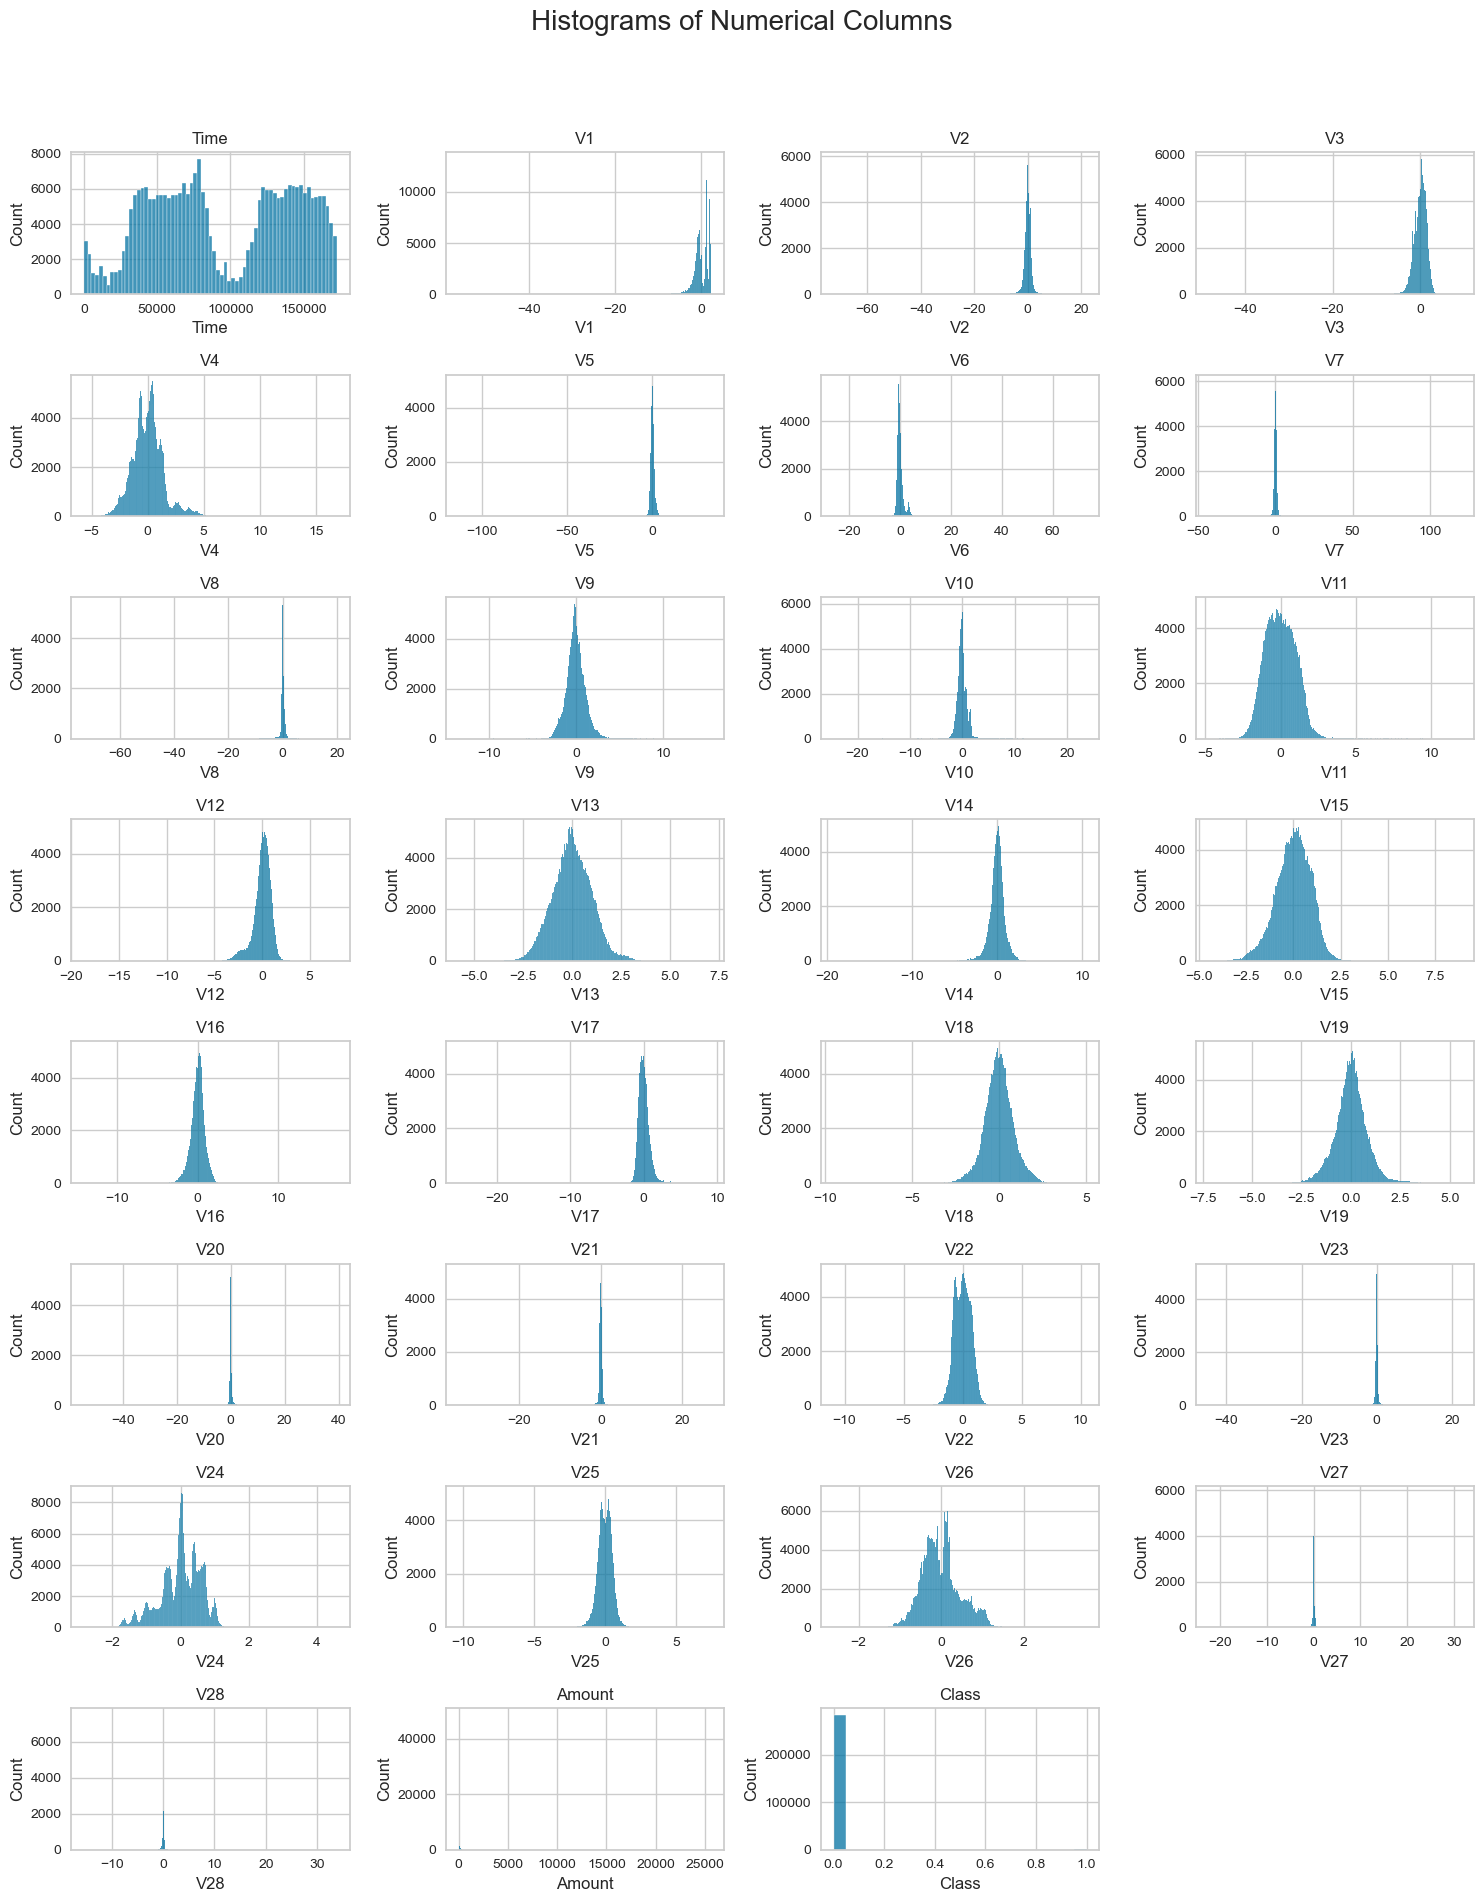

In [ ]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(8, 4, i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])                                     
    sns.histplot(df.iloc[:, i])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**V(1-28) Featurları incelendiğinde;**

1-) BİRBİRLERİYLE KORELASYONLARI 0'DIR.

2-) MEAN : 0 , STD : 1 'DİR.

3-) HİSTOGRAMLARINA BAKTIĞIMIZDA HER BİRİNİN NORMAL DAĞILIMDA OLDUĞUNU GÖRÜYORUZ.

4-) V FEATURLARINDA MISSING VALUE YOKTUR.ÇÜNKÜ PCA MİSSİNG VALUELARI KABUL ETMEZ.

BU BİLGİLERE BAKARAK V FEATURLARININ PCA İLE DÖNÜŞTÜRÜLMÜŞ OLDUĞUNU SÖYLEYEBİLİRİZ.

------------------------------------------------------------------------------------
1-) THERE IS NO MULTICOLLINEARITY.

2-) MEAN : 0 , STD : 1.

3-) WE CAN SEE THAT ALL V-FEATURES ARE DISTRIBUTED NORMALLY.

4-) THERE IS NO MISSING VALUE BECAUSE OF PCA.

SO, WE CAN SAY THAT V-FEATURES TRANSFORMED BY PCA.

### Data Cleaning
Check Missing Values and Outliers

In [26]:
print('Missing Value   : ', df.isnull().sum().sum())
print('Duplicated Rows : ', df.duplicated().sum())

Missing Value   :  0
Duplicated Rows :  1081


In [27]:
df[df.duplicated(keep='first')==True].Class.value_counts() 

0    1062
1      19
Name: Class, dtype: int64

In [28]:
#We didn't drop duplicate values to not to lose values belongs to Class 1

In [29]:
# OUTLIERS
import colorama
from colorama import Fore, Style

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df.select_dtypes(['int64', 'float64']):
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<10} : ', cond); count += cond
    print(f'\n{Fore.RED}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
V1         :  7059
V2         :  13524
V3         :  3360
V4         :  11146
V5         :  12292
V6         :  22963
V7         :  8945
V8         :  24131
V9         :  8281
V10        :  9494
V11        :  780
V12        :  15348
V13        :  3366
V14        :  14147
V15        :  2893
V16        :  8182
V17        :  7419
V18        :  7533
V19        :  10204
V20        :  27767
V21        :  14494
V22        :  1315
V23        :  18538
V24        :  4774
V25        :  5367
V26        :  5597
V27        :  39160
V28        :  30340
Amount     :  31902
Class      :  492

TOTAL OUTLIERS FOR 1.5 IQR : 370813

Outliers for 2 IQR :
-------------------------------------
V1         :  4429
V2         :  8957
V3         :  1813
V4         :  4734
V5         :  6034
V6         :  19015
V7         :  5806
V8         :  17308
V9         :  2968
V10        :  5765
V11        :  334
V12        :  8258
V13        :  401
V14        : 

## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [30]:
from deepchecks.tabular import Dataset
ds =  Dataset(df, label="Class", cat_features=[])

In [ ]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FRGHQB3DVJL0O1103HCCRWIRC">Data Integrity Sui…

In [31]:
X = df.drop(['Time','Class'], axis=1)
y = df['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [33]:
y_train.value_counts(), y_test.value_counts()

(0    227449
 1       394
 Name: Class, dtype: int64,
 0    56863
 1       98
 Name: Class, dtype: int64)

In [34]:
print(y_train.value_counts(normalize=True).values)
print(y_test.value_counts(normalize=True).values)

[0.99827074 0.00172926]
[0.99827952 0.00172048]


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [35]:
from deepchecks.tabular import Dataset

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [ ]:
from deepchecks.tabular.suites import train_test_validation

res = train_test_validation().run(train_ds, test_ds) #result
res

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_H2F9B6J3BW7SK8YMFJS4NM6VY">Train Test Validat…

**We check that we don't have data leakage problem!**

In [ ]:
# stratfy = y uyguladığımız için 0 ve 1 classları aynı oranda almış oldu.

In [36]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

# Logistic Regression Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [37]:
from sklearn.linear_model import LogisticRegression

**We try class_weight as "balanced" to see the result for imbalanced dataset!**

In [38]:
from deepchecks.tabular.suites import model_evaluation


operations = [("Scaler", RobustScaler()), 
              ("log", LogisticRegression(class_weight="balanced", 
                                         random_state=1))]

pipeline_log_balanced = Pipeline(steps=operations)
pipeline_log_balanced.fit(X_train, y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_log_balanced)
result

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 9 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_YFETXQG07YYGNQ8SGJCR6I7WR">Model Evaluation S…

[[55517  1346]
 [    8    90]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.95      0.55     56961
weighted avg       1.00      0.98      0.99     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227449
           1       0.06      0.92      0.12       394

    accuracy                           0.98    227843
   macro avg       0.53      0.95      0.55    227843
weighted avg       1.00      0.98      0.99    227843



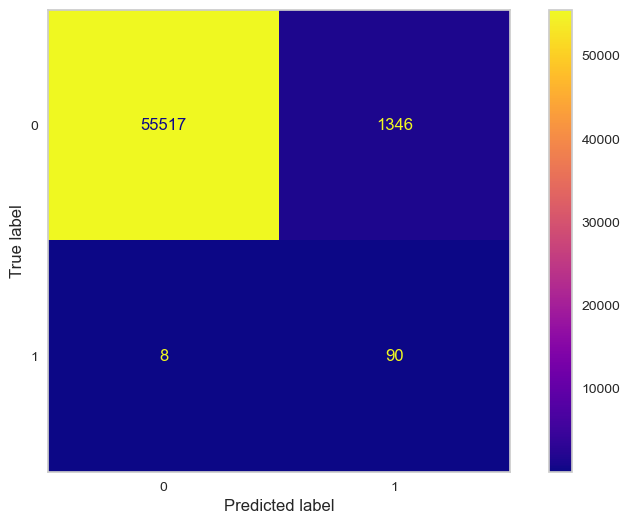

In [41]:
eval(pipeline_log_balanced, X_train, X_test)

#As we see, we couldn't get good result for presicion. This means model coluldn't balanced enough yet!
#(Still class 1 is not enough to predict)

In [42]:
from deepchecks.tabular.suites import model_evaluation


operations = [("Scaler", RobustScaler()), 
              ("log", LogisticRegression(class_weight={1:10,0:1},
                                         #we try various class_weight.We decided to use 1:10,0:1
                                         random_state=1))]

pipeline_log = Pipeline(steps=operations)
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log',
                 LogisticRegression(class_weight={0: 1, 1: 10},
                                    random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_log)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_W8VGEQOSBUWEH7GT43YCR6H54">Model Evaluation S…

[[56844    19]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.89      0.85        98

    accuracy                           1.00     56961
   macro avg       0.91      0.94      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.75      0.80      0.77       394

    accuracy                           1.00    227843
   macro avg       0.87      0.90      0.89    227843
weighted avg       1.00      1.00      1.00    227843



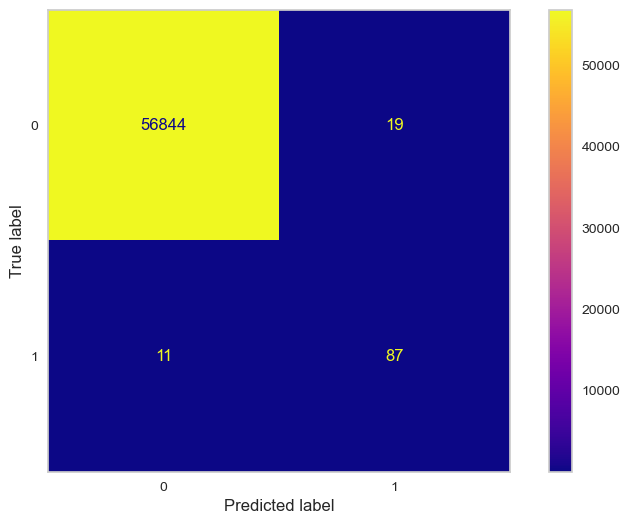

In [43]:
eval(pipeline_log, X_train, X_test)

#we need to make cross-validation.

## Logistic Model Cross Validation (StratifiedKFold)

In [ ]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10 ,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.750
train_precision   0.750
test_recall       0.797
train_recall      0.803
test_f1           0.772
train_f1          0.776
dtype: float64

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=model)
result
#We fixed the error by changing class_weight {1:10,0:1}.

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 9 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_VYX16BGZJZC71CKN14L7361CM">Model Evaluation S…

## Logistic Model GridsearchCV

In [15]:
operations = [("Scaler", RobustScaler()), 
              ("log", LogisticRegression(class_weight={1:10,0:1},
                                         #we try various class_weight.We decided to use 1:10,0:1
                                         random_state=1))]
model = Pipeline(operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 8)
solver = ['liblinear', 'lbfgs',"saga"]

param_grid = {"log__penalty" : penalty,
             "log__C" : C,
             "log__solver" : solver}

log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="precision", cv=10, n_jobs=-1)

In [16]:
log_grid_model.fit(X_train, y_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', RobustScaler()),
                                       ('log',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 10},
                                                           random_state=1))]),
             n_jobs=-1,
             param_grid={'log__C': array([  0.1       ,   0.26826958,   0.71968567,   1.93069773,
         5.17947468,  13.89495494,  37.2759372 , 100.        ]),
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='precision')

In [17]:
log_grid_model.best_estimator_

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 10},
                                    penalty='l1', random_state=1,
                                    solver='saga'))])

In [18]:
log_grid_model.best_params_

{'log__C': 0.1, 'log__penalty': 'l1', 'log__solver': 'saga'}

In [19]:
log_grid_model.best_score_

0.760062702594795

**Finding Best Threshold for max recall score with our best paremeters**

In [45]:
operations = [("Scaler", RobustScaler()), 
              ("log_model", LogisticRegression(class_weight={1:10,0:1},
                                               max_iter=10000,
                                               random_state=1,
                                               penalty = "l1", #our best parameters
                                               C = 0.1,
                                               solver="liblinear"))]

In [46]:
pipeline_log_best_params = Pipeline(steps=operations)
pipeline_log_best_params.fit(X_train, y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 10},
                                    max_iter=10000, penalty='l1',
                                    random_state=1, solver='liblinear'))])

In [47]:
y_pred_proba = pipeline_log_best_params.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

[[56844    19]
 [   10    88]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.90      0.86        98

    accuracy                           1.00     56961
   macro avg       0.91      0.95      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.76      0.80      0.78       394

    accuracy                           1.00    227843
   macro avg       0.88      0.90      0.89    227843
weighted avg       1.00      1.00      1.00    227843



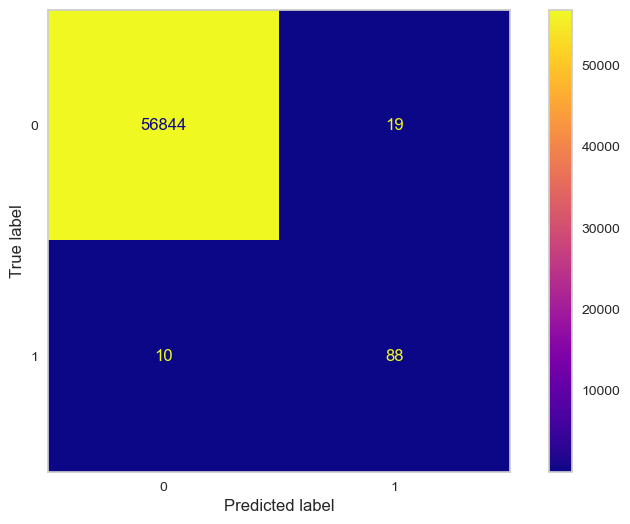

In [48]:
eval(pipeline_log_best_params, X_train, X_test)

We calculate threshold to maximize f1 score.
Because f1 score is harmonic avarega of recall+precision scores. We need high performance for both of them.

In [49]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6044337998371275

In [50]:
#Thresold değerleri ile oynadığımızda TP sayısını değiştiremedik
#optimal_threshold = 0.30 ----> TP(True-Positive) 88 
#optimal_threshold = 0.40 ----> TP 88 
#optimal_threshold = 0.50 ----> TP 88 

In [51]:
# test scores
print("TEST SCORES")
y_pred_threshold = pd.Series(pipeline_log_best_params.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
#Yeni threshold değerleri ile y prediction aldık.
#We calculate y_pred with new threshold 
print(confusion_matrix(y_test,y_pred_threshold))
print(classification_report(y_test,y_pred_threshold))


TEST SCORES
[[56849    14]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.87      0.86        98

    accuracy                           1.00     56961
   macro avg       0.93      0.93      0.93     56961
weighted avg       1.00      1.00      1.00     56961



In [52]:
# train scores
print("TRAIN SCORES")
y_train_pred_threshold = pd.Series(pipeline_log_best_params.predict_proba(X_train)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
#Yeni threshold değerleri ile y train prediction aldık.
#We calculate y_pred with new threshold 
print(confusion_matrix(y_train, y_train_pred_threshold))
print(classification_report(y_train, y_train_pred_threshold))


TRAIN SCORES
[[227364     85]
 [    80    314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.80      0.79       394

    accuracy                           1.00    227843
   macro avg       0.89      0.90      0.90    227843
weighted avg       1.00      1.00      1.00    227843



## Feature Selection For Logistic Regression

In [53]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
pipeline_log_shap = LogisticRegression(class_weight={1:10, 0:1}, 
                                       random_state=1, 
                                       penalty='l1', 
                                       C=0.1, solver="liblinear")
pipeline_log_shap.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 10}, penalty='l1',
                   random_state=1, solver='liblinear')

[[56844    19]
 [   10    88]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.90      0.86        98

    accuracy                           1.00     56961
   macro avg       0.91      0.95      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.76      0.80      0.78       394

    accuracy                           1.00    227843
   macro avg       0.88      0.90      0.89    227843
weighted avg       1.00      1.00      1.00    227843



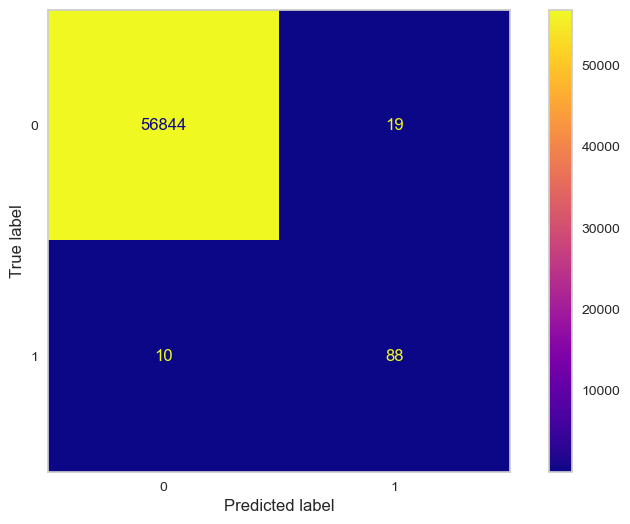

In [55]:
eval(pipeline_log_shap, X_train_scaled, X_test_scaled)

In [56]:
import shap #We applied "shap" to see feature importance
explainer = shap.Explainer(pipeline_log_shap, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

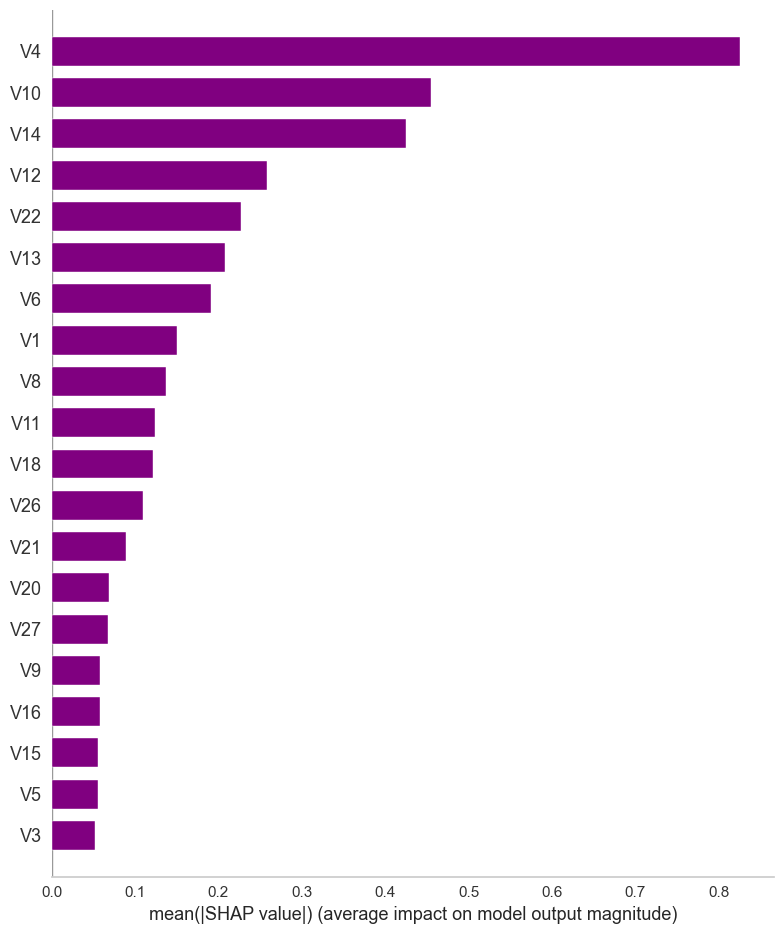

In [57]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar",color="purple")

In [58]:
fraud = ['V4','V10','V14','V12',"V22", "V13"] # We choosed best 6 features.

In [59]:
X2 = df[fraud]
y  = df['Class']

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, stratify=y, random_state=1)

In [61]:
operations_shap = [("log_model", LogisticRegression(class_weight={1:10,0:1},
                                                    max_iter=10000,
                                                    random_state=1,
                                                    penalty = "l1",
                                                    C = 0.1,
                                                    solver="liblinear"))]

In [62]:
pipeline_log_shap = Pipeline(steps=operations_shap)
pipeline_log_shap.fit(X2_train, y2_train)

Pipeline(steps=[('log_model',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 10},
                                    max_iter=10000, penalty='l1',
                                    random_state=1, solver='liblinear'))])

[[56835    28]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.89      0.82        98

    accuracy                           1.00     56961
   macro avg       0.88      0.94      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.72      0.79      0.76       394

    accuracy                           1.00    227843
   macro avg       0.86      0.90      0.88    227843
weighted avg       1.00      1.00      1.00    227843



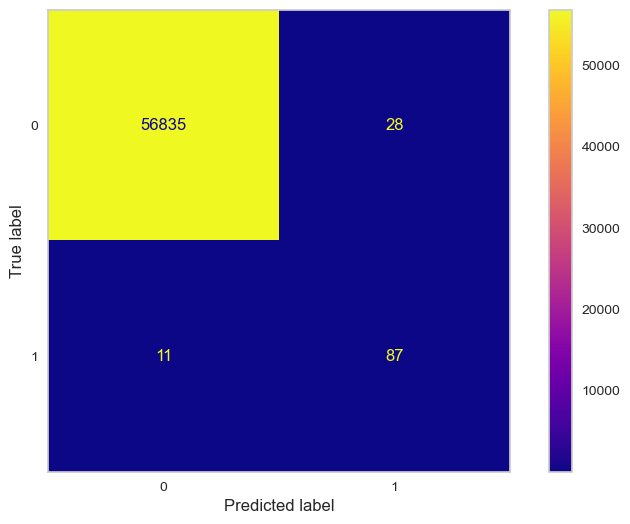

In [63]:
eval(pipeline_log_shap, X2_train, X2_test)

#### Cross Validation

In [ ]:
model = pipeline_log_shap
scores = cross_validate(model, X2_train, y2_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]


test_precision    0.726
train_precision   0.726
test_recall       0.794
train_recall      0.795
test_f1           0.758
train_f1          0.759
dtype: float64

        test_precision    0.750
        train_precision   0.750
        test_recall       0.797
        train_recall      0.803
        test_f1           0.772
        train_f1          0.776
        dtype: float64

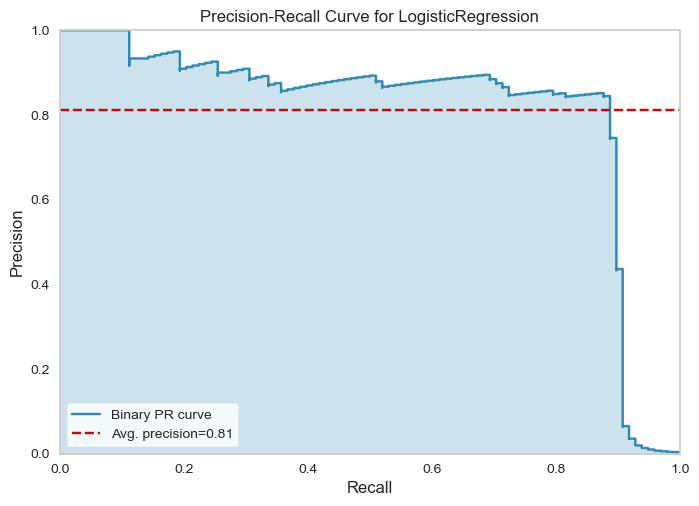

In [ ]:
viz = PrecisionRecallCurve(pipeline_log_shap)

viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();
#We check Precison-Recall Curve for imbalanced data to see how well the classes separated !

We saved our model for model comparing 

In [64]:
y_pred = pipeline_log_shap.predict(X2_test)

log_precision = precision_score(y2_test, y_pred, labels=["Class"])
log_recall = recall_score(y2_test, y_pred, labels=["Class"])
log_f1 = f1_score(y2_test, y_pred, labels=["Class"])

***ii. Model Training***

In [65]:
from sklearn.metrics import matthews_corrcoef

y_pred = pipeline_log_shap.predict(X2_test)

matthews_corrcoef(y2_test, y_pred)

0.8191836324360813

In [66]:
list(pipeline_log_shap.feature_names_in_)

['V4', 'V10', 'V14', 'V12', 'V22', 'V13']

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [67]:
from deepchecks.tabular.suites import model_evaluation

In [68]:
train_ds = Dataset(X_train[list(pipeline_log_shap.feature_names_in_)], label=y_train, cat_features=[])
test_ds = Dataset(X_test[list(pipeline_log_shap.feature_names_in_)], label=y_test, cat_features=[])

In [ ]:
#We checked with DeepCheck
res = model_evaluation().run(train_ds, test_ds, pipeline_log_shap)
res

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 1 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FVK5LTIN3TKSDYZJHZ1QB2JIM">Model Evaluation S…

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

# Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

**We should apply smote during cross validation not before, to avoid overfitting.**

In [69]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

#Smote
over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

operations = [('o', over), ('u', under), 
              ("scaler", RobustScaler()), 
              ('log_model', LogisticRegression(random_state = 1))]

log_pipeline_smote = imbpipeline(steps=operations)
log_pipeline_smote.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('scaler', RobustScaler()),
                ('log_model', LogisticRegression(random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_ds, test_ds, log_pipeline_smote)
result

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 10 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_U5AVDWIQI80UOUKQ78Z68HAJC">Model Evaluation S…

[[56851    12]
 [   17    81]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56961
   macro avg       0.94      0.91      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.80      0.76      0.78       394

    accuracy                           1.00    227843
   macro avg       0.90      0.88      0.89    227843
weighted avg       1.00      1.00      1.00    227843



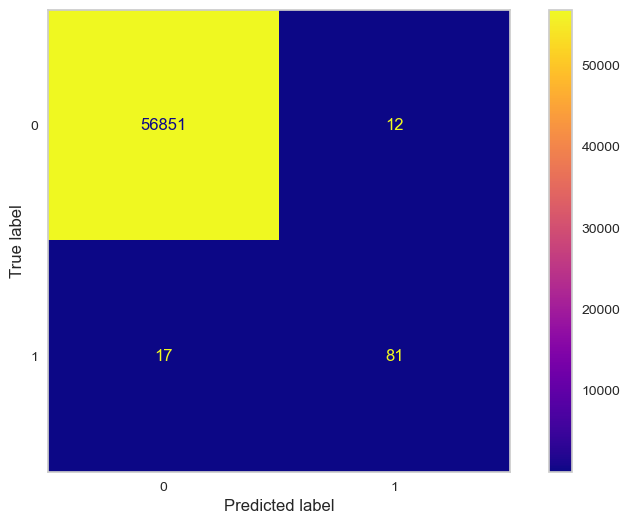

In [70]:
eval(log_pipeline_smote, X_train, X_test)

## Cross Validation 

In [ ]:
model = log_pipeline_smote
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10 ,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.793
train_precision   0.803
test_recall       0.746
train_recall      0.752
test_f1           0.768
train_f1          0.776
dtype: float64

## GridsearchCV with Smote Model

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3)
under = RandomUnderSampler(sampling_strategy={0: 200000})

operations = [('o', over), ('u', under), 
              ("scaler", RobustScaler()), 
              ('log_model', LogisticRegression(random_state = 1))]

model = imbpipeline(steps=operations)
C = np.logspace(-1, 2, 8)


param_grid = {"log_model__penalty" : ["l1", "l2"],
             "log_model__C" : C,
             "log_model__solver" : ['liblinear', 'lbfgs',"saga"]}

sm_log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=10, n_jobs=-1)

In [39]:
sm_log_grid_model.fit(X_train, y_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('o',
                                        SMOTE(k_neighbors=3,
                                              sampling_strategy={1: 1000})),
                                       ('u',
                                        RandomUnderSampler(sampling_strategy={0: 200000})),
                                       ('scaler', RobustScaler()),
                                       ('log_model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1       ,   0.26826958,   0.71968567,   1.93069773,
         5.17947468,  13.89495494,  37.2759372 , 100.        ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='recall')

In [43]:
sm_log_grid_model.best_estimator_

Pipeline(steps=[('o', SMOTE(k_neighbors=3, sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 200000})),
                ('scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(C=0.7196856730011519, penalty='l1',
                                    random_state=1, solver='liblinear'))])

In [44]:
sm_log_grid_model.best_params_

{'log_model__C': 0.7196856730011519,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [45]:
sm_log_grid_model.best_score_

0.7615384615384615

**Finding Best Threshold for max recall score with our best paremeters for Smoted Model**

In [71]:
over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

operations = [('o', over), ('u', under), 
              ("scaler", RobustScaler()), 
              ('log_model', LogisticRegression( max_iter=10000,
                                                random_state=1,
                                                penalty = "l1", #our best parameters
                                                C = 0.1,
                                                solver="liblinear"))]

#Model Fit
log_pipe_model_grid = imbpipeline(steps=operations)
log_pipe_model_grid.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('scaler', RobustScaler()),
                ('log_model',
                 LogisticRegression(C=0.1, max_iter=10000, penalty='l1',
                                    random_state=1, solver='liblinear'))])

In [ ]:
#Model Evaluation! We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=log_pipe_model_grid)
result

[[56850    13]
 [   16    82]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56961
   macro avg       0.93      0.92      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.80      0.76      0.78       394

    accuracy                           1.00    227843
   macro avg       0.90      0.88      0.89    227843
weighted avg       1.00      1.00      1.00    227843



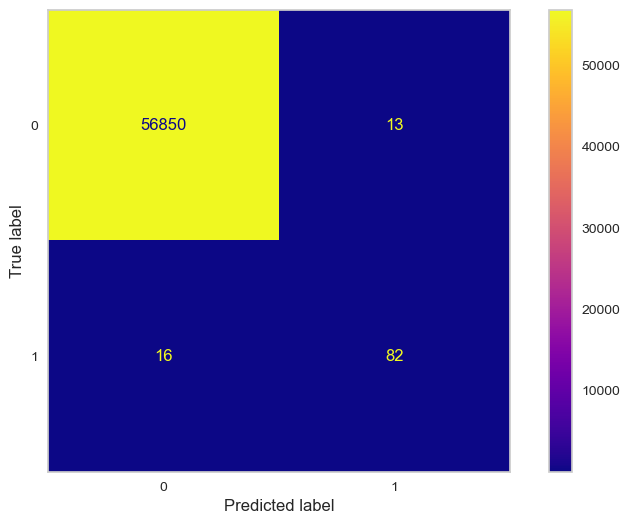

In [72]:
eval(log_pipe_model_grid, X_train, X_test)

In [73]:
y_pred_proba = log_pipe_model_grid.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [74]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2554671187155474

In [75]:
# test scores
print("TEST SCORES")
y_pred_threshold = pd.Series(log_pipe_model_grid.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
#Yeni threshold değerleri ile y prediction aldık.
#We calculate y_pred with new threshold 
print(confusion_matrix(y_test,y_pred_threshold))
print(classification_report(y_test,y_pred_threshold))


TEST SCORES
[[56849    14]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.87      0.86        98

    accuracy                           1.00     56961
   macro avg       0.93      0.93      0.93     56961
weighted avg       1.00      1.00      1.00     56961



In [76]:
# train scores
print("TRAIN SCORES")
y_train_pred_threshold = pd.Series(log_pipe_model_grid.predict_proba(X_train)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
#Yeni threshold değerleri ile y train prediction aldık.
#We calculate y_pred with new threshold 
print(confusion_matrix(y_train, y_train_pred_threshold))
print(classification_report(y_train, y_train_pred_threshold))


TRAIN SCORES
[[227369     80]
 [    81    313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.80      0.79      0.80       394

    accuracy                           1.00    227843
   macro avg       0.90      0.90      0.90    227843
weighted avg       1.00      1.00      1.00    227843



In [77]:
y_pred = log_pipe_model_grid.predict(X_test)

log_smote_precision = precision_score(y_test, y_pred, labels=["Class"])
log_smote_recall = recall_score(y_test, y_pred, labels=["Class"])
log_smote_f1 = f1_score(y_test, y_pred, labels=["Class"])

# Random Forest Classifier Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [78]:
from sklearn.ensemble import RandomForestClassifier    
from deepchecks.tabular.suites import model_evaluation
from sklearn.model_selection import cross_validate

operations = [("rf",  RandomForestClassifier(class_weight ="balanced",  
                                             max_depth=5, 
                                             random_state=1))]

pipeline_rf_balanced = Pipeline(steps=operations)
pipeline_rf_balanced.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_rf_balanced)
result

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 39 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_U1N8G07LZUNDSMVM7Y3ZV2DBO">Model Evaluation S…

[[56648   215]
 [    9    89]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.29      0.91      0.44        98

    accuracy                           1.00     56961
   macro avg       0.65      0.95      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.29      0.90      0.44       394

    accuracy                           1.00    227843
   macro avg       0.64      0.95      0.72    227843
weighted avg       1.00      1.00      1.00    227843



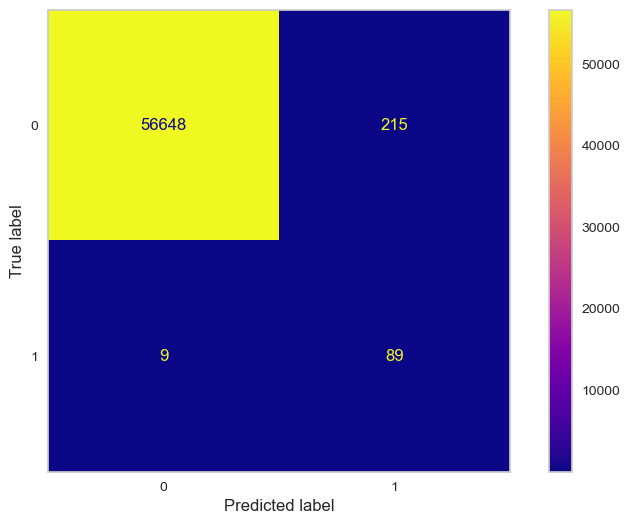

In [79]:
eval(pipeline_rf_balanced, X_train, X_test)

In [ ]:
#When we use class_weight as a "balanced" , then our precision score become very low.
#So we choose class_weight = {1:10, 0:1}

In [80]:
operations = [("rf",  RandomForestClassifier(class_weight ={1:10, 0:1} ,  #tried many times
                                             max_depth=5, 
                                             random_state=1))]

pipeline_rf= Pipeline(steps=operations)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_rf)
result

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 35 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_3RFPOXCZP95TAELR667U17GLT">Model Evaluation S…

[[56852    11]
 [   13    85]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.87      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.93      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.83      0.85       394

    accuracy                           1.00    227843
   macro avg       0.94      0.91      0.93    227843
weighted avg       1.00      1.00      1.00    227843



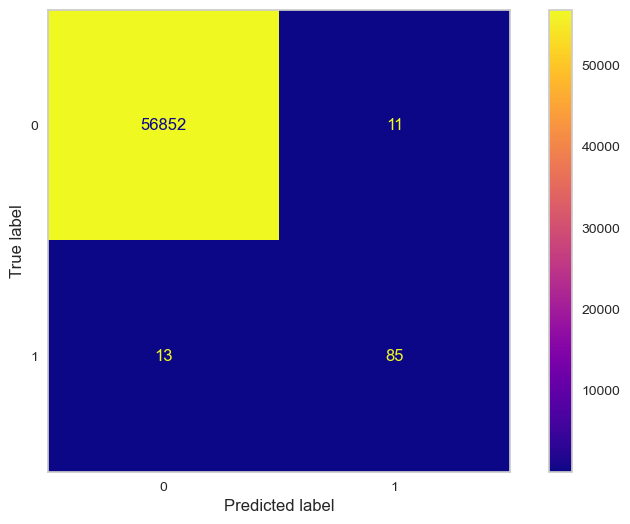

In [81]:
eval(pipeline_rf, X_train, X_test)

## Random Forest Model Cross Validation (StratifiedKFold)

In [ ]:
#Let's tune this model
model = pipeline_rf
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.861
train_precision   0.884
test_recall       0.784
train_recall      0.824
test_f1           0.820
train_f1          0.853
dtype: float64

## Random Forest Model GridsearchCV

In [82]:
param_grid = { 
    'rf__n_estimators': [100],           # [50,100,200] denendi
    'rf__max_features': [3, 5, 'auto'],  # [[3, 5, 'auto',"sqrt"] denendi
    'rf__max_depth' : [5,7,12],          # [3,5,7,12]
}

In [83]:
rf_grid_model = GridSearchCV(estimator=pipeline_rf,
                          param_grid=param_grid,
                          scoring='recall',   
                          cv=10,
                          verbose=1,
                          n_jobs = -1)

In [84]:
rf_grid_model.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 10},
                                                               max_depth=5,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 7, 12],
                         'rf__max_features': [3, 5, 'auto'],
                         'rf__n_estimators': [100]},
             scoring='recall', verbose=1)

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=rf_grid_model)
result   

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_IJPLWCPTXNNTT4UGZFP98NJHT">Model Evaluation S…

In [ ]:
print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)


 {'rf__max_depth': 5, 'rf__max_features': 5, 'rf__n_estimators': 100}

 Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        max_features=5, random_state=1))])

 Best Score : 0.7844871794871795


In [85]:
#Random Forest Model with best parameters
operations = [("rf",  RandomForestClassifier(class_weight ={1:10, 0:1} ,  
                                             max_depth=5, 
                                             max_features = 5,
                                             random_state=1))]

pipeline_rf= Pipeline(steps=operations)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        max_features=5, random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_rf)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_2PKZEZT8T2F81IZN2D0NI3L2F">Model Evaluation S…

[[56852    11]
 [   13    85]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.87      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.93      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.83      0.85       394

    accuracy                           1.00    227843
   macro avg       0.94      0.91      0.93    227843
weighted avg       1.00      1.00      1.00    227843



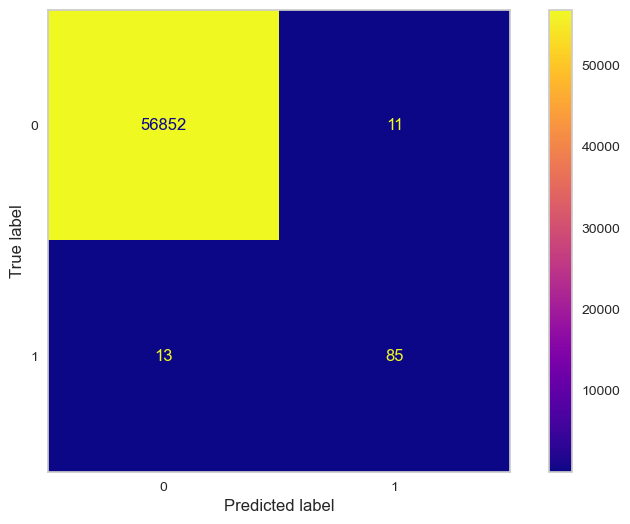

In [86]:
eval(pipeline_rf, X_train, X_test)

We tried class_weight = {1:25,0:1} and scores;

                        test_precision    0.847
                        train_precision   0.867
                        test_recall       0.789
                        train_recall      0.832
                        test_f1           0.815
                        train_f1          0.849
                        dtype: float64


In [87]:
y_pred = pipeline_rf.predict(X_test)

rf_precision = precision_score(y_test, y_pred, labels=["Class"])
rf_recall = recall_score(y_test, y_pred, labels=["Class"])
rf_f1 = f1_score(y_test, y_pred, labels=["Class"])

## Feature Selection for Random Forest Model

**We wanted to see best features**

In [ ]:
rf_model = RandomForestClassifier(class_weight ={1:10, 0:1},  #with best parameters
                                  max_depth=5,  
                                  max_features = 5,
                                  random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5, max_features=5,
                       random_state=1)

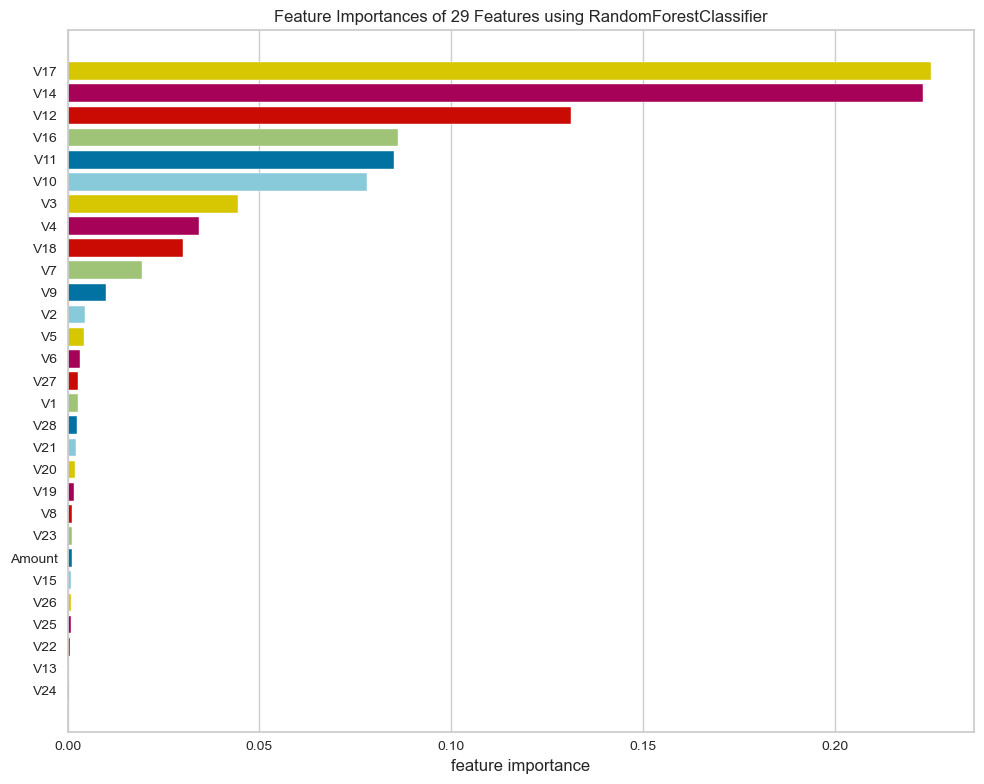

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model, relative=False, labels=X.columns)
visualizer = RadViz(size=(1000, 800))
viz.fit(X_train, y_train)                
viz.show();

In [88]:
rf_feature_importance = ['V17','V14','V12','V16','V11','V10','V3','V4','V18'] #with 9 features

In [89]:
X5 = df[rf_feature_importance]
y = df['Class']

In [90]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, stratify=y, random_state=1)

In [91]:
X5_train.shape, X5_test.shape, y5_train.shape, y5_test.shape

((227843, 9), (56961, 9), (227843,), (56961,))

In [ ]:
operations = [("rf",  RandomForestClassifier(class_weight={1:10, 0:1}, 
                                             max_depth=5,
                                             random_state=1))]

pipeline_rf_final = Pipeline(steps=operations)

pipeline_rf_final.fit(X5_train, y5_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        random_state=1))])

[[56852    11]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.88      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.87      0.83      0.85       394

    accuracy                           1.00    227843
   macro avg       0.93      0.91      0.92    227843
weighted avg       1.00      1.00      1.00    227843



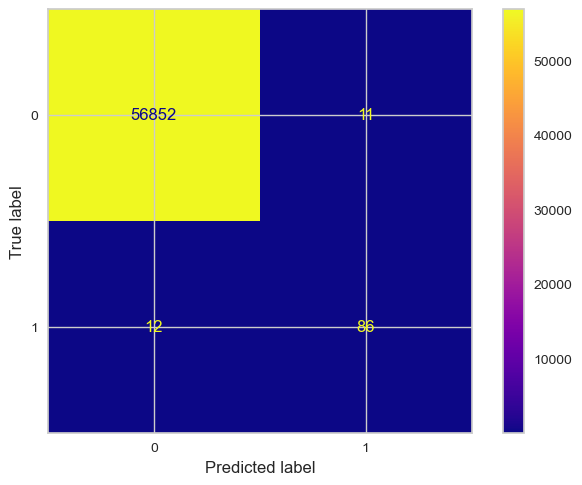

In [ ]:
eval(pipeline_rf_final, X5_train, X5_test)

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_rf_final)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6JMQIE9EDNX6XY94I40SNRGUY">Model Evaluation S…

### Cross Validation with Importance Features

In [ ]:
model = pipeline_rf_final
scores = cross_validate(model, X5_train, y5_train, scoring = ['precision','recall','f1'], cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision    0.836
train_precision   0.873
test_recall       0.797
train_recall      0.828
test_f1           0.815
train_f1          0.850
dtype: float64

### GridSearchCV with Importance Features

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [93]:
operations = [("RF_model", RandomForestClassifier(random_state=42,class_weight={1:10, 0:1}))]
pipe_model = Pipeline(steps=operations)

In [94]:
param_grid = { 
    'RF_model__n_estimators': [100],           # [50,100,200] denendi
    'RF_model__max_features': [3, 5, 'auto'],  # [[3, 5, 'auto',"sqrt"] denendi
    'RF_model__max_depth' : [5,7,12],          # [3,5,7,12]
}

In [95]:
rf_grid_model = GridSearchCV(estimator=pipe_model,
                             param_grid=param_grid,
                             scoring='recall',   
                             cv=10,
                             verbose=1,
                             n_jobs = -1)

In [96]:
rf_grid_model.fit(X5_train, y5_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RF_model',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 10},
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [5, 7, 12],
                         'RF_model__max_features': [3, 5, 'auto'],
                         'RF_model__n_estimators': [100]},
             scoring='recall', verbose=1)

In [97]:
print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)


 {'RF_model__max_depth': 5, 'RF_model__max_features': 3, 'RF_model__n_estimators': 100}

 Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        max_features=3, random_state=42))])

 Best Score : 0.8021153846153846


[[56851    12]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.89      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.87      0.83      0.85       394

    accuracy                           1.00    227843
   macro avg       0.93      0.91      0.92    227843
weighted avg       1.00      1.00      1.00    227843



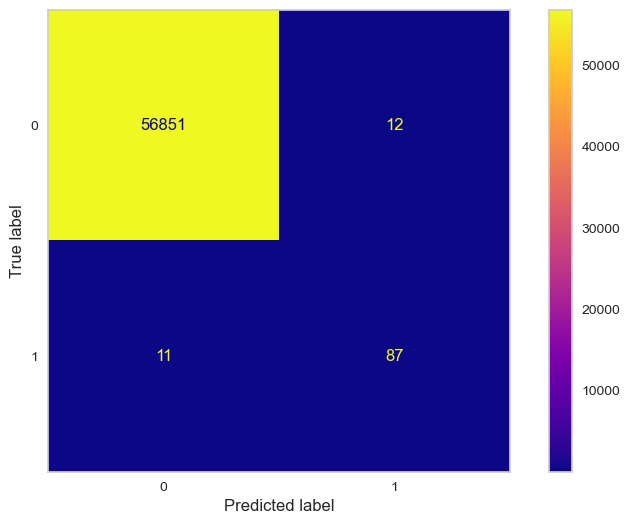

In [98]:
eval(rf_grid_model, X5_train, X5_test)

In [99]:
y_pred = rf_grid_model.predict(X5_test) #with 9 fetaures 

rf_9f_precision = precision_score(y5_test, y_pred, labels=["Class"])
rf_9f_recall = recall_score(y5_test, y_pred, labels=["Class"])
rf_9f_f1 = f1_score(y5_test, y_pred, labels=["Class"])

# Random Forest Classifier with SMOTE

**we should apply smote during cross validation not before, to avoid overfitting.**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

over = SMOTE(sampling_strategy={1: 5000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

operations = [('o', over), ('u', under), ('sm_RF', RandomForestClassifier(max_depth=5, 
                                                                          random_state=1,
                                                                          max_features=5))]

pipeline_smote_rf = imbpipeline(steps=operations)
pipeline_smote_rf.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 5000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('sm_RF',
                 RandomForestClassifier(max_depth=5, max_features=5,
                                        random_state=1))])

[[56851    12]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.88      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.84      0.83      0.83       394

    accuracy                           1.00    227843
   macro avg       0.92      0.91      0.92    227843
weighted avg       1.00      1.00      1.00    227843



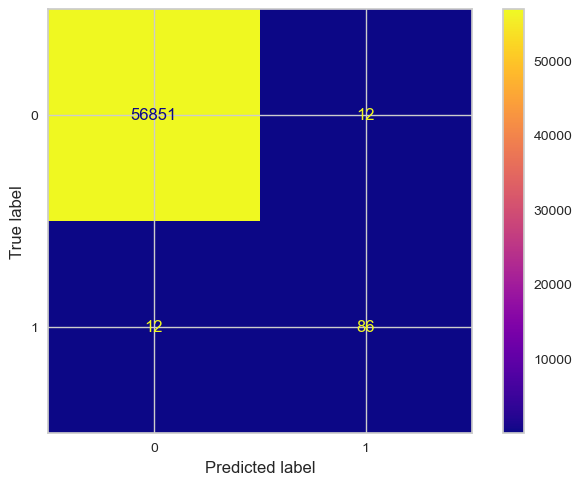

In [ ]:
eval(pipeline_smote_rf, X_train, X_test)

### Cross Validation 

In [ ]:
model = pipeline_smote_rf
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]


test_precision    0.814
train_precision   0.844
test_recall       0.812
train_recall      0.827
test_f1           0.811
train_f1          0.835
dtype: float64

Scores before smote;

        test_precision    0.839
        train_precision   0.860
        test_recall       0.795
        train_recall      0.823
        test_f1           0.815
        train_f1          0.841
        dtype: float64

### GridSearchCV with Smote Model

In [ ]:
param_grid = { 
    'sm_RF__n_estimators': [100],           # [50,100,200] denendi
    'sm_RF__max_features': [3, 5, 'auto'],  # [[3, 5, 'auto',"sqrt"] denendi
    'sm_RF__max_depth'   : [5,7,12],          # [3,5,7,12]
}

In [ ]:
rf_grid_sm_model = GridSearchCV( pipeline_smote_rf,
                                 param_grid=param_grid,
                                 scoring='recall',   
                                 cv=10,
                                 verbose=1,
                                 n_jobs = -1)

In [ ]:
rf_grid_sm_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('o',
                                        SMOTE(k_neighbors=3, random_state=1,
                                              sampling_strategy={1: 5000})),
                                       ('u',
                                        RandomUnderSampler(random_state=1,
                                                           sampling_strategy={0: 200000})),
                                       ('sm_RF',
                                        RandomForestClassifier(max_depth=5,
                                                               max_features=5,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'sm_RF__max_depth': [5, 7, 12],
                         'sm_RF__max_features': [3, 5, 'auto'],
                         'sm_RF__n_estimators': [100]},
             scoring='recall', verbose=1)

In [ ]:
rf_grid_sm_model.best_params_

{'sm_RF__max_depth': 5, 'sm_RF__max_features': 3, 'sm_RF__n_estimators': 100}

**Random Forest Classifier Smote Model with best parameters**

In [100]:
over = SMOTE(sampling_strategy={1: 5000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

operations = [('o', over), ('u', under), ('sm_RF', RandomForestClassifier(max_depth=5,
                                                                          random_state=1,
                                                                          max_features=3))]

pipeline_smote_rf_best = imbpipeline(steps=operations)
pipeline_smote_rf_best.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 5000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('sm_RF',
                 RandomForestClassifier(max_depth=5, max_features=3,
                                        random_state=1))])

[[56851    12]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.89      0.88        98

    accuracy                           1.00     56961
   macro avg       0.94      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.85      0.80      0.83       394

    accuracy                           1.00    227843
   macro avg       0.93      0.90      0.91    227843
weighted avg       1.00      1.00      1.00    227843



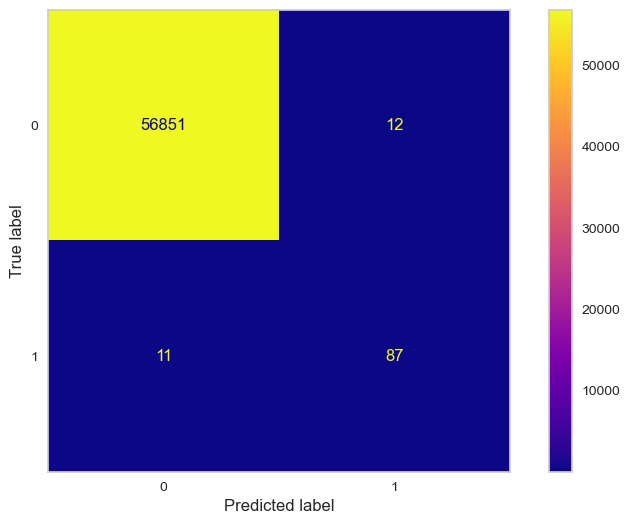

In [101]:
eval(pipeline_smote_rf_best, X_train, X_test)

In [ ]:
model = pipeline_smote_rf_best
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.919
train_precision   0.952
test_recall       0.658
train_recall      0.693
test_f1           0.764
train_f1          0.802
dtype: float64

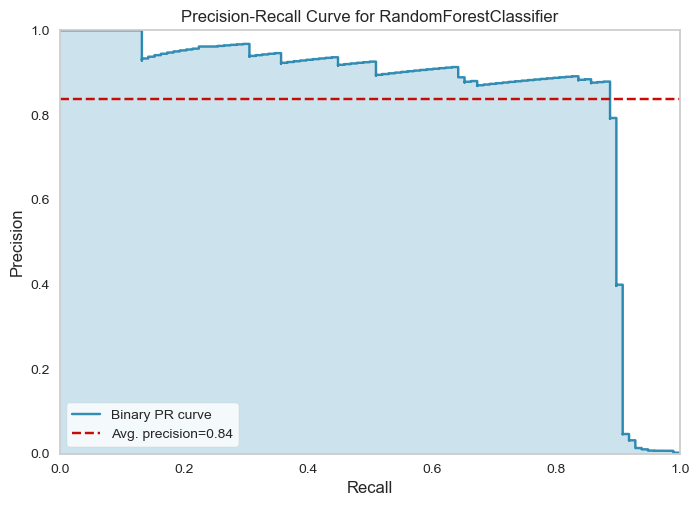

In [ ]:
viz = PrecisionRecallCurve(pipeline_smote_rf_best)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [102]:
y_pred = pipeline_smote_rf_best.predict(X_test) 

rf_smote_precision = precision_score(y_test, y_pred, labels=["Class"])
rf_smote_recall = recall_score(y_test, y_pred, labels=["Class"])
rf_smote_f1 = f1_score(y_test, y_pred, labels=["Class"])

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score,\
                            roc_curve,average_precision_score

### Feature Selection with Smote Model for Random Forest

In [ ]:
over = SMOTE(sampling_strategy={1: 5000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

X_resampled, y_resampled = over.fit_resample(X_train, y_train)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

pipeline_smote_rf_best = RandomForestClassifier(max_depth=5,
                                                random_state=1,
                                                max_features=3)

pipeline_smote_rf_best.fit(X_resampled, y_resampled)

pipeline_smote_rf_best.feature_importances_

array([0.00635846, 0.00939928, 0.06896154, 0.0309033 , 0.00973626,
       0.01070833, 0.01601551, 0.00150807, 0.02635256, 0.0959024 ,
       0.08451075, 0.13576042, 0.00081748, 0.19122307, 0.00071451,
       0.06132567, 0.19056194, 0.02917222, 0.00464798, 0.00149571,
       0.00991754, 0.00063172, 0.00070975, 0.0006961 , 0.00064599,
       0.0004735 , 0.00550713, 0.00366751, 0.0016753 ])

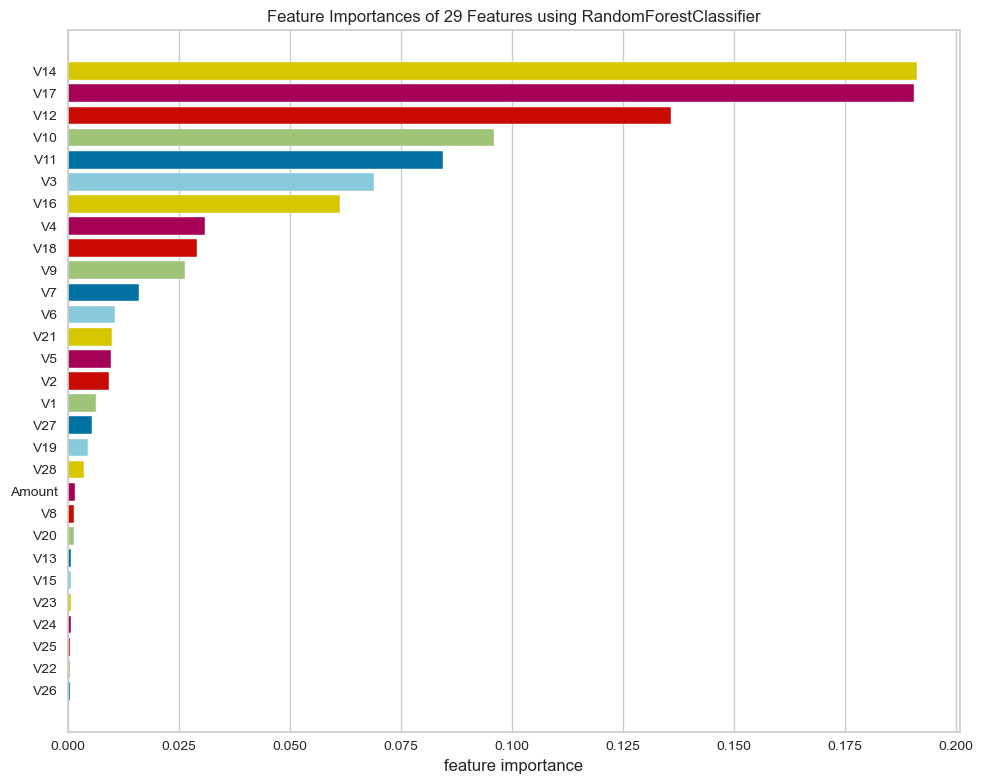

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(pipeline_smote_rf_best, relative=False, labels=X.columns)
visualizer = RadViz(size=(1000, 800))
viz.fit(X_train, y_train)                
viz.show();

**We checked that feature importance with smoted model is as same as the not smoted model. we will continue with these best features: rf_feature_importance =['V17','V14','V12','V16','V11','V10','V3','V4','V18']**
.see 6.3 chapter!

In [103]:
operations = [('o', over), ('u', under), ('sm_RF', RandomForestClassifier(max_depth=5,
                                                                          random_state=1,
                                                                          max_features=3))]

pipeline_smote_rf_best_features = imbpipeline(steps=operations)
pipeline_smote_rf_best_features.fit(X5_train, y5_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 5000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('sm_RF',
                 RandomForestClassifier(max_depth=5, max_features=3,
                                        random_state=1))])

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_smote_rf_best_features)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_ON58PK48C5RW71DW4KLRUCEWV">Model Evaluation S…

[[56849    14]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.89      0.87        98

    accuracy                           1.00     56961
   macro avg       0.93      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.83      0.83      0.83       394

    accuracy                           1.00    227843
   macro avg       0.91      0.91      0.91    227843
weighted avg       1.00      1.00      1.00    227843



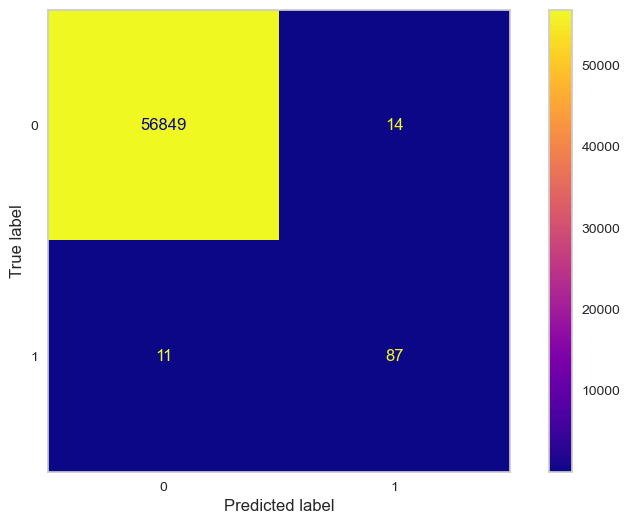

In [104]:
eval(pipeline_smote_rf_best_features, X5_train, X5_test)

In [ ]:
model = pipeline_smote_rf_best_features
scores = cross_validate(model, X5_train, y5_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.793
train_precision   0.824
test_recall       0.810
train_recall      0.832
test_f1           0.799
train_f1          0.828
dtype: float64

Scores before not chose best features ;

        test_precision    0.814
        train_precision   0.844
        test_recall       0.812
        train_recall      0.827
        test_f1           0.811
        train_f1          0.835
        dtype: float64

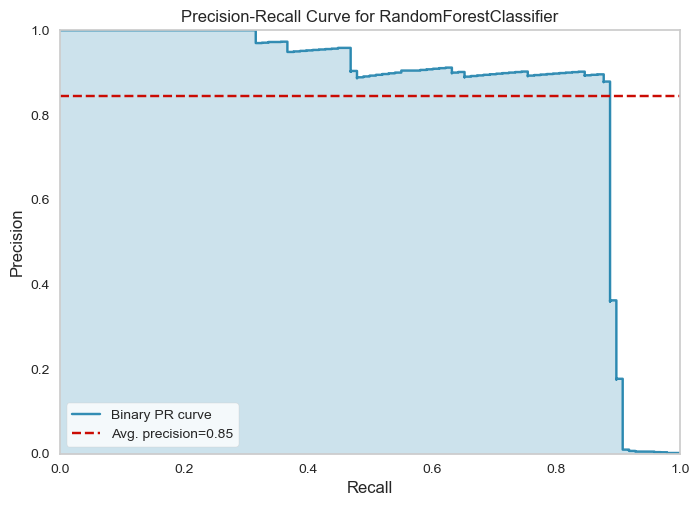

In [ ]:
viz = PrecisionRecallCurve(pipeline_smote_rf_best_features)

viz.fit(X5_train, y5_train)
viz.score(X5_test, y5_test)
viz.show();

In [105]:
y_pred = pipeline_smote_rf_best_features.predict(X5_test) 

rf_smote_9f_precision = precision_score(y5_test, y_pred, labels=["Class"])
rf_smote_9f_recall = recall_score(y5_test, y_pred, labels=["Class"])
rf_smote_9f_f1 = f1_score(y5_test, y_pred, labels=["Class"])

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X5_train, label=y_train, cat_features=[])
test_ds = Dataset(X5_test, label=y_test, cat_features=[])

#Model Evaluation 
res = model_evaluation().run(train_ds, test_ds, pipeline_smote_rf_best)
res

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 8 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_GANEU4VKGVQWBG44DOZ5T9YCK">Model Evaluation S…

# XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [106]:
import xgboost as xgb
from xgboost import XGBClassifier

In [107]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train)
classes_weights

array([0.50086613, 0.50086613, 0.50086613, ..., 0.50086613, 0.50086613,
       0.50086613])

In [ ]:
from deepchecks.tabular.suites import model_evaluation


operations = [("xgb", XGBClassifier(random_state=1))]

pipeline_xgb_balanced = Pipeline(steps=operations)
pipeline_xgb_balanced.fit(X_train, y_train, xgb__sample_weight = classes_weights)

result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model= pipeline_xgb_balanced)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6QCIAYWEAYXX0OUUAW7C5WBKK">Model Evaluation S…

[[56853    10]
 [   10    88]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.90      0.90        98

    accuracy                           1.00     56961
   macro avg       0.95      0.95      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227843
   macro avg       1.00      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



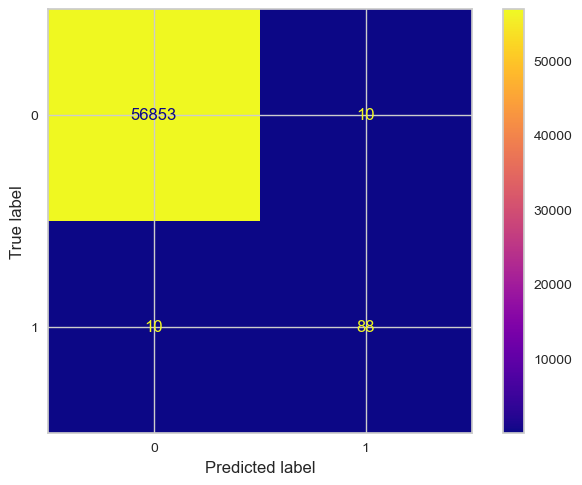

In [ ]:
eval(pipeline_xgb_balanced, X_train, X_test)

We can see that model became over-fit when we use class_weight = "balanced".
So We decided to use class_weight {1:30, 0:1}

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight = {1:30, 0:1}, y = y_train)
classes_weights

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
operations = [("xgb", XGBClassifier(random_state=1))]

pipeline_xgb = Pipeline(steps=operations)
pipeline_xgb.fit(X_train, y_train, xgb__sample_weight=classes_weights)

result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_xgb)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_MWLUKAPPDXUA120UMMLZ9RWL9">Model Evaluation S…

[[56854     9]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.89      0.90        98

    accuracy                           1.00     56961
   macro avg       0.95      0.94      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227843
   macro avg       1.00      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



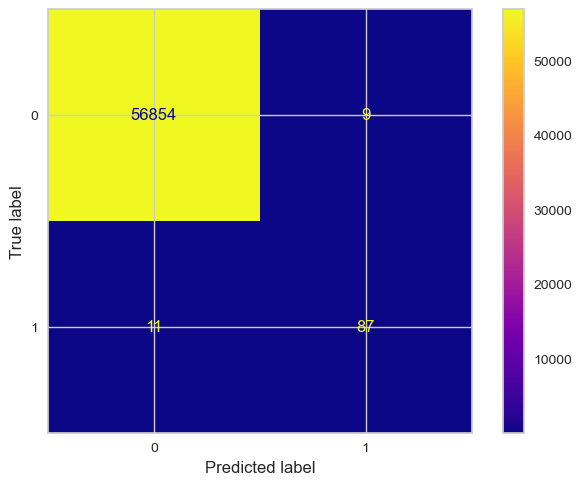

In [ ]:
eval(pipeline_xgb, X_train, X_test)

In [ ]:
operations = [("xgb", XGBClassifier(scale_pos_weight=35, random_state=1))]

pipeline_xgb = Pipeline(steps=operations)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                    

[[56854     9]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.89      0.90        98

    accuracy                           1.00     56961
   macro avg       0.95      0.94      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227843
   macro avg       1.00      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



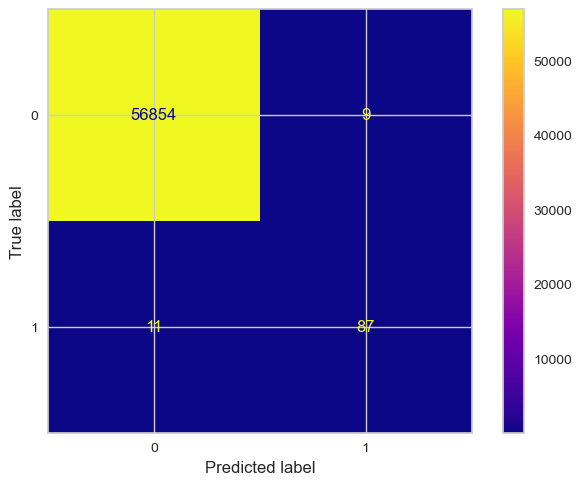

In [ ]:
eval(pipeline_xgb, X_train, X_test)

### Cross Validation 

In [ ]:
operations = [ ("xgb", XGBClassifier(random_state=1, scale_pos_weight=35))]

model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.940
train_precision   1.000
test_recall       0.785
train_recall      1.000
test_f1           0.853
train_f1          1.000
dtype: float64

In [ ]:
#We checked with DeepCheck
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=pipeline_xgb)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_K37W1355H0AZ6ZHV0NV7D9QW7">Model Evaluation S…

### GridSearch

In [ ]:
operations = [ ("xgb", XGBClassifier(random_state=1, scale_pos_weight=35))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"xgb__n_estimators":[50],        # [50, 100,200]
              'xgb__max_depth':[1,2,8], 
              "xgb__learning_rate": [0.70],     #  [0.01,002,0.2,0.7]
              "xgb__subsample":[0.8],
              "xgb__colsample_bytree":[0.6]           # [0.6,0.8,1]
             }


xgb_grid_model = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              scoring = 'recall',    
                              n_jobs = -1,
                              cv=10,
                              verbose=1)

xgb_grid_model.fit(X_train, y_train) 

#Model Evaluation
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=xgb_grid_model)
result

Fitting 10 folds for each of 3 candidates, totalling 30 fits


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_142V9FOLIH55W4YZK46MC9OEV">Model Evaluation S…

[[56757   106]
 [    9    89]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.91      0.61        98

    accuracy                           1.00     56961
   macro avg       0.73      0.95      0.80     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.48      0.88      0.62       394

    accuracy                           1.00    227843
   macro avg       0.74      0.94      0.81    227843
weighted avg       1.00      1.00      1.00    227843



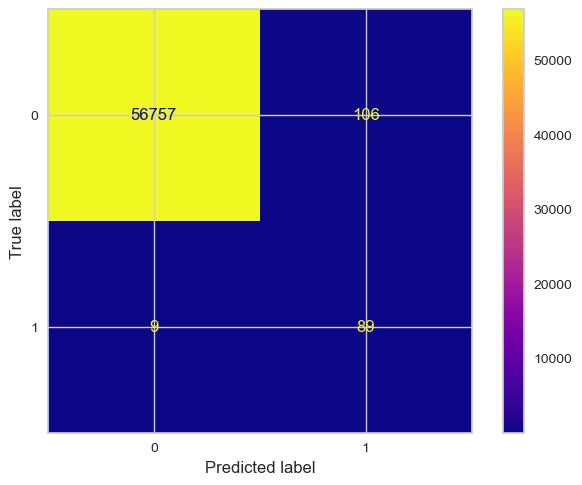

In [ ]:
eval(xgb_grid_model, X_train, X_test)

In [ ]:
operations = [ ("xgb", XGBClassifier(random_state=1, scale_pos_weight=35))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"xgb__n_estimators":[50],        # [50, 100,200]
              'xgb__max_depth':[1,2,8], 
              "xgb__learning_rate": [0.70],     #  [0.01,002,0.2,0.7]
              "xgb__subsample":[0.8],
              "xgb__colsample_bytree":[0.6]           # [0.6,0.8,1]
             }


xgb_grid_model = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              scoring = 'precision',
                              n_jobs = -1,
                              cv=10,
                              verbose=1)

xgb_grid_model.fit(X_train, y_train) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                 

In [ ]:
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=xgb_grid_model)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_PVGOZGEVMRXPZDWI1EAOEL0VM">Model Evaluation S…

[[56853    10]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.88      0.89        98

    accuracy                           1.00     56961
   macro avg       0.95      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227843
   macro avg       1.00      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



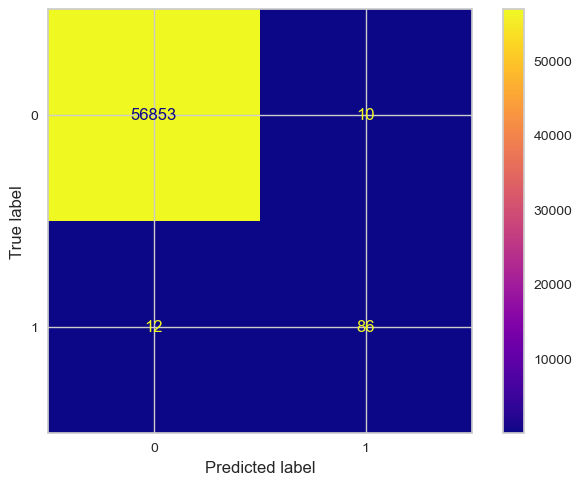

In [ ]:
eval(xgb_grid_model, X_train, X_test)

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.7,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=8, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, ...))])

In [ ]:
xgb_grid_model.best_params_

{'xgb__colsample_bytree': 0.6,
 'xgb__learning_rate': 0.7,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.8}

In [ ]:
xgb_grid_model.best_score_

0.8823042156049248

In [ ]:
xgb_final_model = XGBClassifier(n_estimators= 50, 
                                colsample_bytree = 0.6, 
                                subsample= 0.8, 
                                learning_rate = 0.7,
                                max_depth= 8,
                                random_state=1, 
                                scale_pos_weight=35)

xgb_final_model.fit(X_train, y_train)

xgb_final_model.feature_importances_

array([0.02195647, 0.00138085, 0.03277361, 0.04842776, 0.00902743,
       0.00818329, 0.00640387, 0.01185759, 0.00783653, 0.03035348,
       0.00860386, 0.04125772, 0.01074579, 0.43703043, 0.00795611,
       0.03786871, 0.12970875, 0.00245358, 0.02858829, 0.0164455 ,
       0.02124668, 0.00514572, 0.00765094, 0.01438489, 0.01792984,
       0.01025064, 0.00763036, 0.00720408, 0.00969726], dtype=float32)

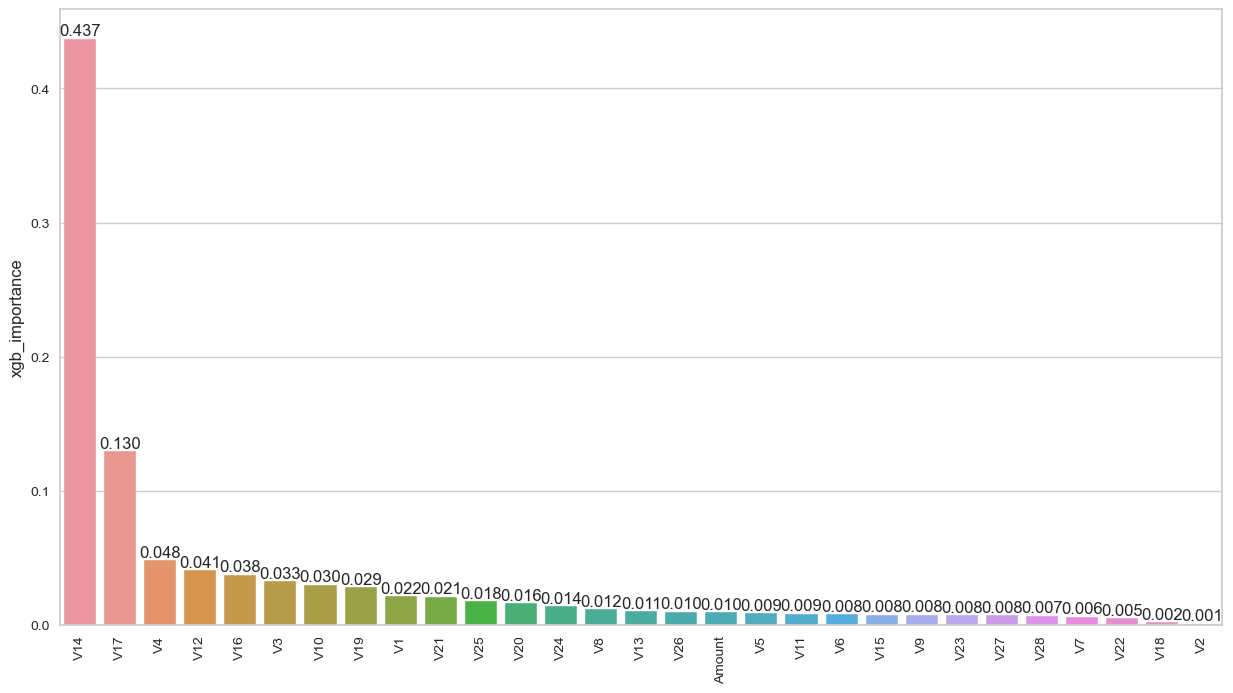

In [ ]:
feats = pd.DataFrame(index = X.columns, data = xgb_final_model.feature_importances_ , columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

plt.figure(figsize=(15,8))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

### Feature Selection for XGBoost

In [108]:
xgb_importance = ["V14","V17","V4","V12","V16"]

In [109]:
X6 = df[xgb_importance]
y = df['Class']

In [110]:
X6.shape

(284804, 5)

In [111]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
operations = [("xgb_importance", XGBClassifier(n_estimators= 50, 
                                 colsample_bytree = 0.6, 
                                 subsample= 0.8, 
                                 learning_rate = 0.7,
                                 max_depth= 8,
                                 random_state=1, 
                                 scale_pos_weight=35))]

xgb_final_model_feature = Pipeline(steps=operations)
xgb_final_model_feature.fit(X6_train, y6_train)

result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=xgb_final_model_feature)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_DOOFJW8K3O5D7ZZPMCE10MS0N">Model Evaluation S…

[[56851    12]
 [   14    84]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56961
   macro avg       0.94      0.93      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227843
   macro avg       1.00      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



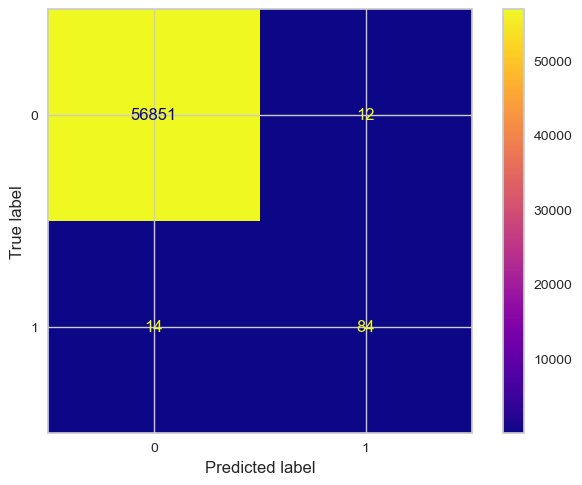

In [ ]:
eval(xgb_final_model_feature, X6_train, X6_test)

#### Cross Validation 

In [ ]:
operations = [("xgb_importance", XGBClassifier(n_estimators= 50, 
                                 colsample_bytree = 0.6, 
                                 subsample= 0.8, 
                                 learning_rate = 0.7,
                                 max_depth= 8,
                                 random_state=1, 
                                 scale_pos_weight=35))]

model = Pipeline(operations)
scores = cross_validate(model, X6_train, y6_train, scoring = ['precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.862
train_precision   0.992
test_recall       0.772
train_recall      1.000
test_f1           0.809
train_f1          0.996
dtype: float64

Scores before using feature selection;

        test_precision    0.940
        train_precision   1.000
        test_recall       0.785
        train_recall      1.000
        test_f1           0.853
        train_f1          1.000
        dtype: float64

# XGBoost Classifier with SMOTE


**we should apply smote during cross validation not before, to avoid overfitting.**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

operations = [('o', over), ('u', under), ('smote_XGB', XGBClassifier(random_state=1))]

smote_pipeline_xgb = imbpipeline(steps=operations)
smote_pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('smote_XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta

In [ ]:
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=smote_pipeline_xgb)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_WTACW7PV9JOGIBTIQ7TJ8SIW7">Model Evaluation S…

[[56854     9]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.88      0.89        98

    accuracy                           1.00     56961
   macro avg       0.95      0.94      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.99      1.00      0.99       394

    accuracy                           1.00    227843
   macro avg       0.99      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



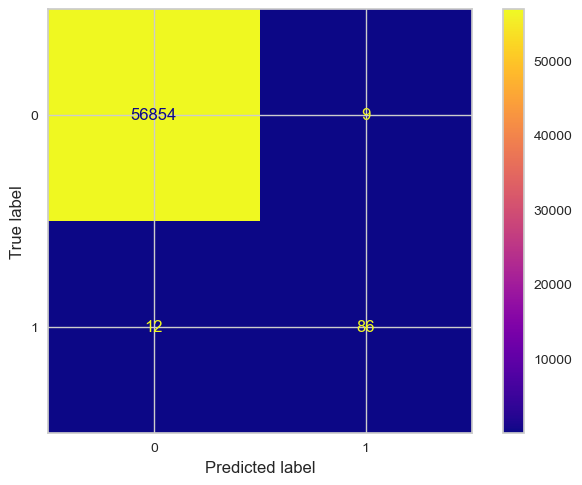

In [ ]:
eval(smote_pipeline_xgb, X_train, X_test)

### Cross Validation

In [ ]:
model = smote_pipeline_xgb
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.953
train_precision   0.999
test_recall       0.812
train_recall      1.000
test_f1           0.875
train_f1          1.000
dtype: float64

[[56854     9]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.88      0.89        98

    accuracy                           1.00     56961
   macro avg       0.95      0.94      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.99      1.00      0.99       394

    accuracy                           1.00    227843
   macro avg       0.99      1.00      1.00    227843
weighted avg       1.00      1.00      1.00    227843



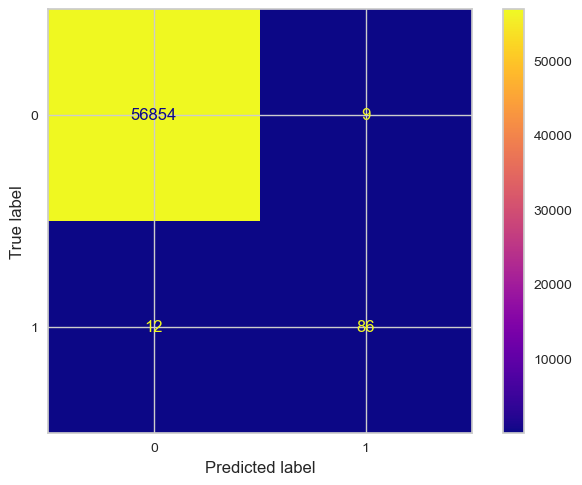

In [ ]:
eval(smote_pipeline_xgb, X_train,X_test)

### GridSearchCV with Smote Model

In [112]:
operations = [('o', over), ('u', under), ('sm_XGB_best', XGBClassifier(random_state=1))]

sm_pipeline_xgb_best = imbpipeline(steps=operations)
sm_pipeline_xgb_best.fit(X_train, y_train)

# define grid parameters
param_grid = {"sm_XGB_best__n_estimators":[50],        # [50, 100,200]
              'sm_XGB_best__max_depth':[1,2,8], 
              "sm_XGB_best__learning_rate": [0.70],     #  [0.01,002,0.2,0.7]
              "sm_XGB_best__subsample":[0.8],
              "sm_XGB_best__colsample_bytree":[0.6]           # [0.6,0.8,1]
             }


sm_pipeline_xgb_best = GridSearchCV(  sm_pipeline_xgb_best ,
                                      param_grid=param_grid,
                                      scoring = 'recall',    
                                      n_jobs = -1,
                                      cv=10,
                                      verbose=1)

sm_pipeline_xgb_best.fit(X_train, y_train) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('o',
                                        SMOTE(k_neighbors=3, random_state=1,
                                              sampling_strategy={1: 5000})),
                                       ('u',
                                        RandomUnderSampler(random_state=1,
                                                           sampling_strategy={0: 200000})),
                                       ('sm_XGB_best',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      early_stopping_rounds=Non

In [113]:
sm_pipeline_xgb_best.best_params_

{'sm_XGB_best__colsample_bytree': 0.6,
 'sm_XGB_best__learning_rate': 0.7,
 'sm_XGB_best__max_depth': 2,
 'sm_XGB_best__n_estimators': 50,
 'sm_XGB_best__subsample': 0.8}

**We will chose "sm_pipeline_xgb_best" model which is smoted with best parameters.In this model deal with Over-Fitting problem**

[[56826    37]
 [   10    88]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.70      0.90      0.79        98

    accuracy                           1.00     56961
   macro avg       0.85      0.95      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.77      0.87      0.82       394

    accuracy                           1.00    227843
   macro avg       0.89      0.94      0.91    227843
weighted avg       1.00      1.00      1.00    227843



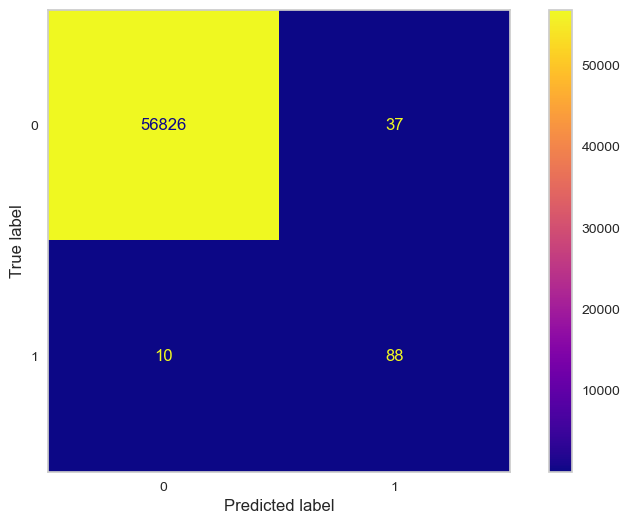

In [114]:
eval(sm_pipeline_xgb_best, X_train, X_test)

In [115]:
operations = [('o', over), ('u', under), ("xgb_best", XGBClassifier(n_estimators= 50, #best parameters
                                                                    colsample_bytree = 0.6, 
                                                                    subsample= 0.8, 
                                                                    learning_rate = 0.7,
                                                                    max_depth= 8,
                                                                    random_state=1, 
                                                                    scale_pos_weight=35))]

sm_pipeline_xgb_best = imbpipeline(steps=operations)
sm_pipeline_xgb_best.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 5000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('xgb_best',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eval_metri...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.7,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                              

[[56849    14]
 [   11    87]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.89      0.87        98

    accuracy                           1.00     56961
   macro avg       0.93      0.94      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.98      1.00      0.99       394

    accuracy                           1.00    227843
   macro avg       0.99      1.00      0.99    227843
weighted avg       1.00      1.00      1.00    227843



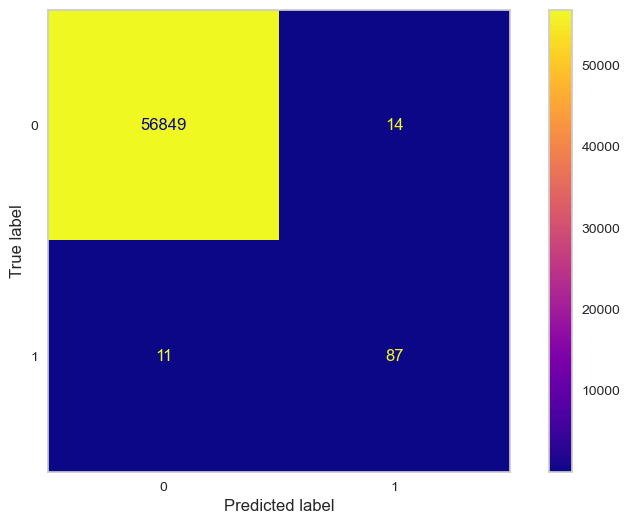

In [116]:
eval(sm_pipeline_xgb_best, X_train, X_test)

In [ ]:
model = sm_pipeline_xgb_best
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.864
train_precision   0.978
test_recall       0.815
train_recall      1.000
test_f1           0.831
train_f1          0.988
dtype: float64

In [117]:
y_pred = sm_pipeline_xgb_best.predict(X_test) 

XGBoost_smote_precision = precision_score(y_test, y_pred, labels=["Class"])
XGBoost_smote_recall = recall_score(y_test, y_pred, labels=["Class"])
XGBoost_smote_f1 = f1_score(y_test, y_pred, labels=["Class"])

#### Feature Selection for Smoted Model

In [ ]:
over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 200000}, random_state=1)

X_resampled, y_resampled = over.fit_resample(X_train, y_train)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

xgb_final_model = XGBClassifier(n_estimators= 50, 
                                colsample_bytree = 0.6, 
                                subsample= 0.8, 
                                learning_rate = 0.7,
                                max_depth= 8,
                                random_state=1, 
                                scale_pos_weight=35)

xgb_final_model.fit(X_resampled, y_resampled)

xgb_final_model.feature_importances_

array([0.00608327, 0.01307105, 0.00741527, 0.02994666, 0.00846172,
       0.01486302, 0.0080985 , 0.00456674, 0.00673652, 0.0321542 ,
       0.01321342, 0.04361638, 0.01462229, 0.6222424 , 0.00559073,
       0.01434455, 0.0243498 , 0.00779872, 0.01389036, 0.00945807,
       0.01703843, 0.01752106, 0.00639411, 0.00574417, 0.01056339,
       0.01769295, 0.01114725, 0.00525517, 0.0081198 ], dtype=float32)

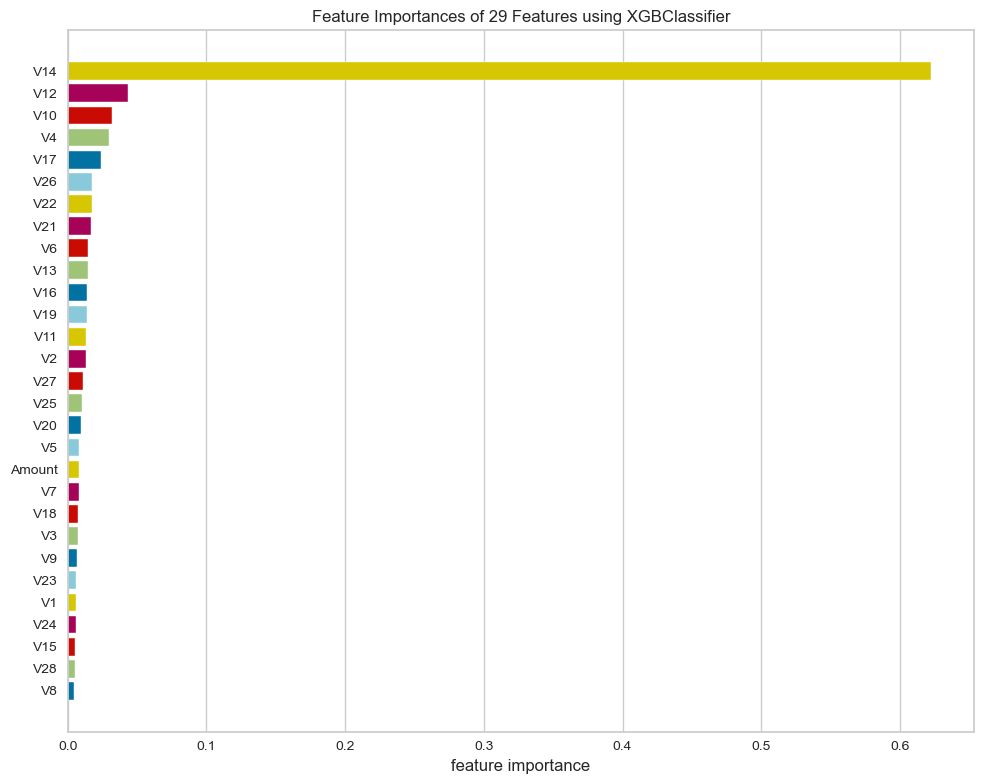

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(xgb_final_model, relative=False, labels=X.columns)
visualizer = RadViz(size=(1000, 800))
viz.fit(X_train, y_train)                
viz.show();

**We checked that feature importance with smoted model is as same as the not smoted model.**

xgb_importance = **["V14","V17","V4","V12","V16"]**. we will continue with these best features.

In [118]:
operations = [('o', over), ('u', under), ("xgb_final_best", XGBClassifier(  n_estimators= 50, 
                                                                            colsample_bytree = 0.6, 
                                                                            subsample= 0.8, 
                                                                            learning_rate = 0.7,
                                                                            max_depth= 8,
                                                                            random_state=1, 
                                                                            scale_pos_weight=35))]

xgb_final_model_fs = imbpipeline(steps=operations)
xgb_final_model_fs.fit(X6_train, y6_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 5000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 200000})),
                ('xgb_final_best',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eval...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.7,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                              

In [ ]:
result = model_evaluation().run(train_dataset=train_ds, test_dataset=test_ds, model=xgb_final_model_fs)
result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_O1UD220X9892OFA0G9QQP47KL">Model Evaluation S…

[[56815    48]
 [   12    86]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.64      0.88      0.74        98

    accuracy                           1.00     56961
   macro avg       0.82      0.94      0.87     56961
weighted avg       1.00      1.00      1.00     56961

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      1.00      0.95       394

    accuracy                           1.00    227843
   macro avg       0.95      1.00      0.98    227843
weighted avg       1.00      1.00      1.00    227843



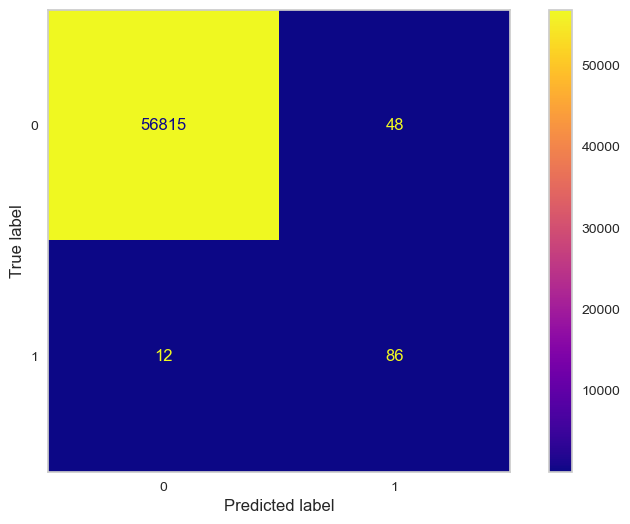

In [119]:
eval(xgb_final_model_fs, X6_train, X6_test)

In [ ]:
model = xgb_final_model_fs
scores = cross_validate(model, X6_train, y6_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_precision    0.864
train_precision   0.978
test_recall       0.815
train_recall      1.000
test_f1           0.831
train_f1          0.988
dtype: float64

In [120]:
y_pred = xgb_final_model_fs.predict(X6_test) 

XGBoost_smote_5f_precision = precision_score(y6_test, y_pred, labels=["Class"])
XGBoost_smote_5f_recall = recall_score(y6_test, y_pred, labels=["Class"])
XGBoost_smote_5f_f1 = f1_score(y6_test, y_pred, labels=["Class"])

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix

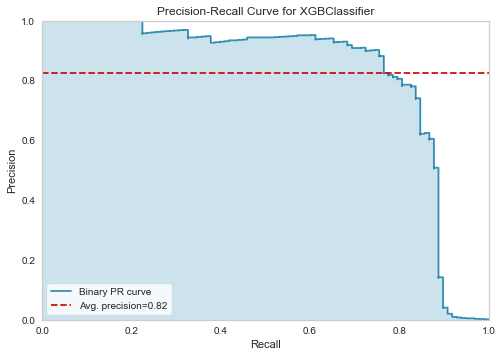

In [ ]:
viz = PrecisionRecallCurve(smote_xgb_model)

viz.fit(X6_train, y6_train)
viz.score(X6_test, y6_test)
viz.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular.suites import model_evaluation

In [ ]:
train_ds = Dataset(X6_train, label=y6_train, cat_features=cat_cols)
test_ds = Dataset(X6_test, label=y6_test, cat_features=cat_cols)

In [ ]:
res = model_evaluation().run(train_ds, test_ds, grid_xgb_model)
res

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 2 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_TI4ZCHRAINI33C3QL5L5QS7GI">Model …

# Comparing ML Models

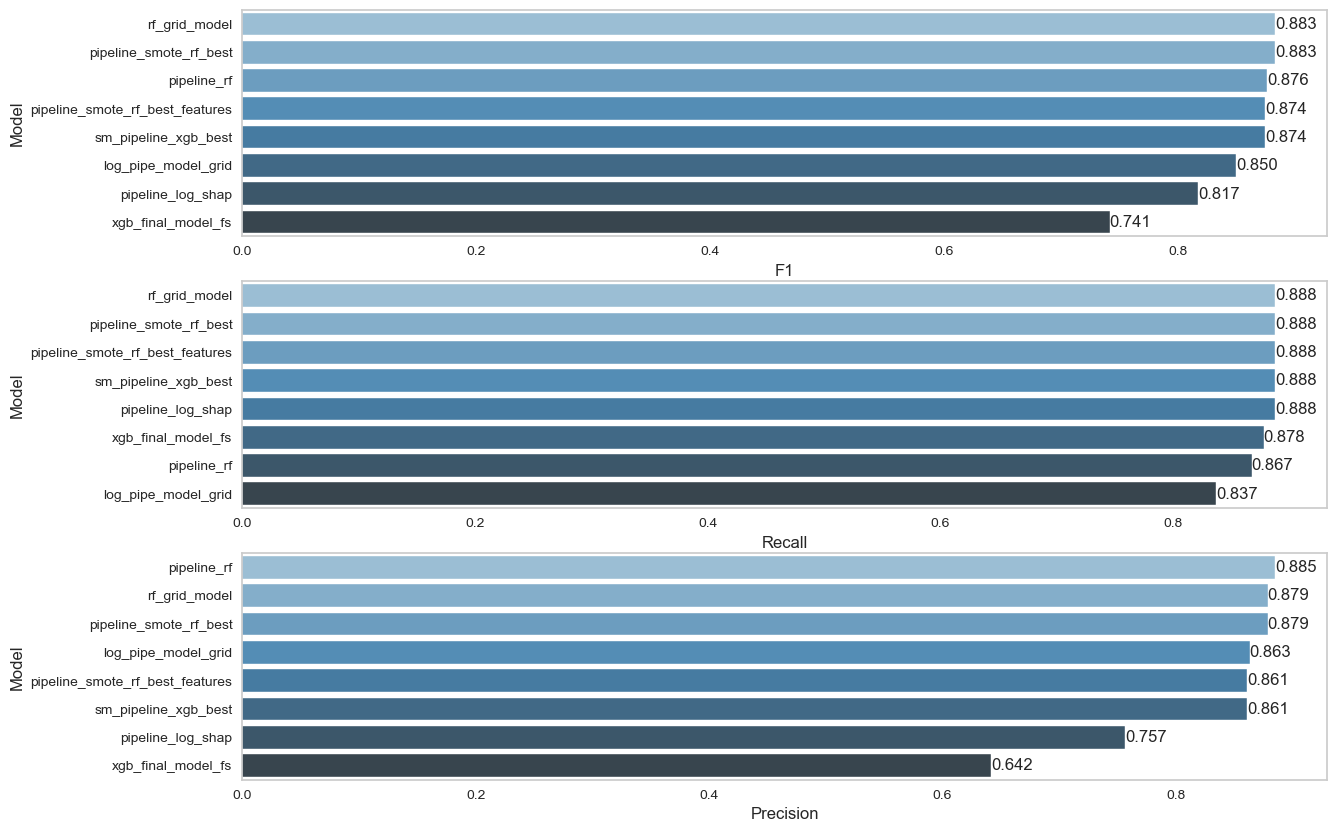

In [121]:
compare=pd.DataFrame({"Model":["pipeline_log_shap","log_pipe_model_grid",
                                "pipeline_rf","rf_grid_model","pipeline_smote_rf_best","pipeline_smote_rf_best_features",
                                "sm_pipeline_xgb_best","xgb_final_model_fs"],
                      
                        "F1": [log_f1, log_smote_f1,
                               rf_f1, rf_9f_f1, rf_smote_f1, rf_smote_9f_f1,
                               XGBoost_smote_f1,XGBoost_smote_5f_f1],
                       
                    "Recall": [log_recall,log_smote_recall,
                               rf_recall, rf_9f_recall, rf_smote_recall, rf_smote_9f_recall,
                               XGBoost_smote_recall, XGBoost_smote_5f_recall],
                 
                 "Precision": [log_precision,log_smote_precision,  
                              rf_precision, rf_9f_precision, rf_smote_precision, rf_smote_9f_precision, 
                              XGBoost_smote_precision, XGBoost_smote_5f_precision]})

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();


# Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

**Apply class_weight{1:25,0:1}**,

**we tried {1:10,0:1} and {1:30,0:1},finally we decided to use {1:25,0:1}**

In [ ]:
class_weights = class_weight.compute_class_weight({1:25,0:1}, classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 1.0, 1: 25.0}

In [ ]:
scaler = RobustScaler() #because of outliers we prefer to use RobustScaler

In [ ]:
X_train = scaler.fit_transform(X_train)      #after that we fit and transform X_train and just transform X_test.
X_test  = scaler.transform(X_test)

**We choose architecture like this  at the beginning.**

**We will apply optuna after that.**

In [ ]:
#tf.random.set_seed(seed)     
model = Sequential()
model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

2023-03-13 23:29:28.207992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=300,
          epochs=50,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])   

Epoch 1/50
684/684 [==============================] - 14s 15ms/step - loss: 0.1315 - recall: 0.5718 - val_loss: 0.0146 - val_recall: 0.7692
Epoch 2/50
684/684 [==============================] - 9s 14ms/step - loss: 0.0504 - recall: 0.8113 - val_loss: 0.0165 - val_recall: 0.8205
Epoch 3/50
684/684 [==============================] - 8s 12ms/step - loss: 0.0420 - recall: 0.8423 - val_loss: 0.0167 - val_recall: 0.7949
Epoch 4/50
684/684 [==============================] - 8s 12ms/step - loss: 0.0367 - recall: 0.8310 - val_loss: 0.0129 - val_recall: 0.7949
Epoch 5/50
684/684 [==============================] - 8s 12ms/step - loss: 0.0359 - recall: 0.8423 - val_loss: 0.0127 - val_recall: 0.7692
Epoch 6/50
684/684 [==============================] - 8s 12ms/step - loss: 0.0372 - recall: 0.8366 - val_loss: 0.0155 - val_recall: 0.7949
Epoch 7/50
684/684 [==============================] - 8s 12ms/step - loss: 0.0336 - recall: 0.8563 - val_loss: 0.0139 - val_recall: 0.7949
Epoch 8/50
684/684 [======

<AxesSubplot:>

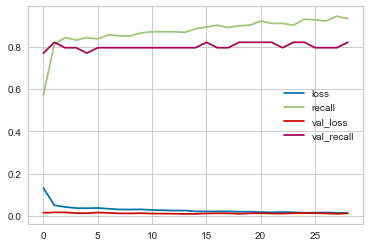

In [ ]:
loss_df=pd.DataFrame(model.history.history) #we see that recall and val_recall have intersection point.
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.0052190497517585754, 0.8877550959587097]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)        # it is the point that loss is minimum.
print("recall : ", recall)

loss :  0.0052190497517585754
recall :  0.8877550959587097


In [ ]:
y_pred = model.predict(X_test) > 0.5    # threshold 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))    # prediction for Test 


1781/1781 [==============================] - 16s 9ms/step
[[56812    52]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.89      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
y_train_pred = model.predict(X_train) > 0.5

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))   # prediction for train 

7121/7121 [==============================] - 55s 8ms/step
[[227293    158]
 [    49    345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.69      0.88      0.77       394

    accuracy                           1.00    227845
   macro avg       0.84      0.94      0.88    227845
weighted avg       1.00      1.00      1.00    227845



1781/1781 [==============================] - 16s 9ms/step


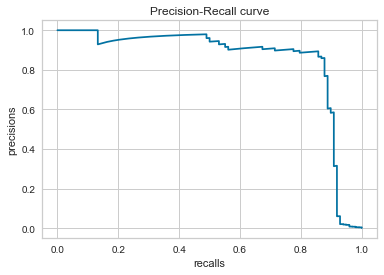

In [ ]:
y_pred = model.predict(X_test)      # we get precision-recall curve instead of Roc-AUC because of imbalance data 

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred) 

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred)

0.8540274386241816

## Optuna (Hyperparameter optimization tool)

**We will optimize Hyperparameters**

In [122]:
#pip install optuna

In [ ]:
data=df
# Split the data into train, test, and validation datasets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
# Separate the features and target variable
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']
X_val = val_data.drop('Class', axis=1)
y_val = val_data['Class']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
trial_metric = "Recall"
batch_size = 512
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 256)
    n_units2 = trial.suggest_int('n_units2', 8, 256)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model
def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-03-13 23:47:11,330] A new study created in memory with name: no-name-8ce60fc5-10ff-412c-a582-b83bf3f1adb5
[I 2023-03-13 23:51:45,423] Trial 0 finished with value: 0.8311688303947449 and parameters: {'n_units1': 25, 'n_units2': 250, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 5.701990168570305e-05, 'w0': 0.0886173228293976, 'w1': 0.16898488847371074}. Best is trial 0 with value: 0.8311688303947449.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-03-13 23:52:49,518] Trial 1 finished with value: 0.5974025726318359 and parameters: {'n_units1': 109, 'n_units2': 35, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.030743943620298884, 'w0': 0.5830375514237797, 'w1': 0.13924716465794354}. Best is trial 0 with value: 0.8311688303947449.


Restoring model weights from the end of the best epoch: 34.
Epoch 49: early stopping


[I 2023-03-13 23:55:15,758] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 252, 'n_units2': 55, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.12379242634828928, 'w0': 0.26323994738224604, 'w1': 3.4482676194849415}. Best is trial 0 with value: 0.8311688303947449.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-03-13 23:56:15,973] Trial 3 finished with value: 0.7402597665786743 and parameters: {'n_units1': 109, 'n_units2': 219, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.006367377816259651, 'w0': 0.33433444420146846, 'w1': 0.07630504838127658}. Best is trial 0 with value: 0.8311688303947449.
[I 2023-03-13 23:59:32,438] Trial 4 finished with value: 0.1818181872367859 and parameters: {'n_units1': 111, 'n_units2': 24, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 1.6517699975656666e-05, 'w0': 0.1873276262209771, 'w1': 0.01720752281692094}. Best is trial 0 with value: 0.8311688303947449.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-03-14 00:00:41,832] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 175, 'n_units2': 136, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.03505689901864188, 'w0': 0.03828409576765283, 'w1': 0.08790425061954052}. Best is trial 0 with value: 0.8311688303947449.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-03-14 00:02:13,714] Trial 6 finished with value: 0.8441558480262756 and parameters: {'n_units1': 219, 'n_units2': 33, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00251341100646029, 'w0': 0.012508723455874853, 'w1': 0.08229677002556746}. Best is trial 6 with value: 0.8441558480262756.
[I 2023-03-14 00:07:41,050] Trial 7 finished with value: 0.5454545617103577 and parameters: {'n_units1': 64, 'n_units2': 239, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00664554012493812, 'w0': 0.9232317102601695, 'w1': 0.6223562616564037}. Best is trial 6 with value: 0.8441558480262756.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-03-14 00:08:26,686] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 63, 'n_units2': 229, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0109647518459915, 'w0': 0.3797232198608503, 'w1': 0.027876450109726992}. Best is trial 6 with value: 0.8441558480262756.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-03-14 00:09:07,211] Trial 9 finished with value: 0.8181818127632141 and parameters: {'n_units1': 174, 'n_units2': 70, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.0024952088771697098, 'w0': 1.877952732822327, 'w1': 2.086456300686946}. Best is trial 6 with value: 0.8441558480262756.


{'n_units1': 219,
 'n_units2': 33,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.00251341100646029,
 'w0': 0.012508723455874853,
 'w1': 0.08229677002556746}

**we can see that our best hyperparameters are up**

**model decides the parameter inside and we decide to arrange the hyperparameters**

In [ ]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'],
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
# train model
model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=512,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

Epoch 1/100
351/351 [==============================] - 4s 6ms/step - loss: 6.0012e-04 - recall: 0.6770 - val_loss: 0.0046 - val_recall: 0.8235
Epoch 2/100
351/351 [==============================] - 2s 5ms/step - loss: 1.7785e-04 - recall: 0.8075 - val_loss: 0.0033 - val_recall: 0.8235
Epoch 3/100
351/351 [==============================] - 2s 5ms/step - loss: 1.5264e-04 - recall: 0.8261 - val_loss: 0.0027 - val_recall: 0.8235
Epoch 4/100
351/351 [==============================] - 2s 5ms/step - loss: 1.3766e-04 - recall: 0.8261 - val_loss: 0.0027 - val_recall: 0.8235
Epoch 5/100
351/351 [==============================] - 2s 5ms/step - loss: 1.2208e-04 - recall: 0.8416 - val_loss: 0.0040 - val_recall: 0.8529
Epoch 6/100
351/351 [==============================] - 2s 5ms/step - loss: 1.1112e-04 - recall: 0.8478 - val_loss: 0.0034 - val_recall: 0.8529
Epoch 7/100
351/351 [==============================] - 2s 5ms/step - loss: 1.0347e-04 - recall: 0.8540 - val_loss: 0.0048 - val_recall: 0.8824

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1336/1336 [==============================] - 2s 2ms/step
[[42625    19]
 [   12    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42644
           1       0.77      0.84      0.81        77

    accuracy                           1.00     42721
   macro avg       0.89      0.92      0.90     42721
weighted avg       1.00      1.00      1.00     42721



1336/1336 [==============================] - 3s 2ms/step


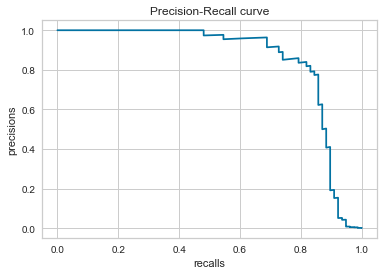

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score

0.8516112983781774

In [ ]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

# Save and Export Variables

In [123]:
import pickle

In [124]:
operations = [("final_model", RandomForestClassifier(max_depth=5, 
                                                     random_state=1,
                                                     class_weight= {1:10,0:1},
                                                     max_features=3))]

In [125]:
pickle_model = Pipeline(steps = operations)

In [126]:
pickle_model.fit(X5, y)

Pipeline(steps=[('final_model',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                                        max_features=3, random_state=1))])

In [127]:
pickle.dump(pickle_model, open('pickle_model', 'wb'))

In [128]:
pickle_model = pickle.load(open("pickle_model", "rb"))

In [129]:
X5.head()

,V17,V14,V12,V16,V11,V10,V3,V4,V18
0,0.208,-0.311,-0.618,-0.470,-0.552,0.091,2.536,1.378,0.026
1,-0.115,-0.144,1.065,0.464,1.613,-0.167,0.166,0.448,-0.183
2,1.110,-0.166,0.066,-2.890,0.625,0.208,1.773,0.380,-0.121
3,-0.684,-0.288,0.178,-1.060,-0.226,-0.055,1.793,-0.863,1.966
4,-0.237,-1.120,0.538,-0.451,-0.823,0.753,1.549,0.403,-0.038


In [131]:
# Prediction 
random = pd.DataFrame({
        'V17': -1.135,
        'V14': -6.417,
        'V12': -0.020,
        'V16': -15.350,
        'V11': 1.050,
        'V10': -5.093,
        'V3' : -0.840,
        'V4' : 1.370,
        'V18': -0.030}, index=[0])

In [132]:
predict = pickle_model.predict(random)
predict 

array([1])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___